In [1]:
import math
import torch
import torch.nn as nn

import fastai

from pytorch_tabnet.sparsemax import (
    Sparsemax
)

from fastai.tabular.all import (
    LinBnDrop
)

from fastai.layers import (
    Identity

)

from Quick.cleaning.loading import (
    examine_dataset
)

from Quick.cleaning.utils import (
    get_file_path
)

from Quick.runners.deep import (
    run_deep_nn_experiment
)

from Quick.runners.residual import (
    run_residual_deep_nn_experiment
)

from Quick.runners.sk import (
    run_sk_experiment
)

from Quick.runners.torch import (
    run_torch_nn_experiment
)

from Quick.constants import *

In [2]:
data_path_1: str = './data/'
data_sets_1: list = [
    'Darknet_experiments_base.csv'
]

file_path_1: callable = get_file_path(data_path_1)
file_set_1: list = list(map(file_path_1, data_sets_1))
current_job: int = 0

dataset_1 = examine_dataset(0, file_set_1, data_sets_1)

Dataset 0/1: We now look at ./data/Darknet_experiments_base.csv


Loading Dataset: ./data/Darknet_experiments_base.csv
	To Dataset Cache: ./cache/Darknet_experiments_base.csv.pickle


        File:				./data/Darknet_experiments_base.csv  
        Job Number:			0
        Shape:				(117620, 64)
        Samples:			117620 
        Features:			64
    


In [3]:
dataset_1['Dataset'].head(100) # pandas dataframe

Protocol  Flow Duration  Total Fwd Packet  Total Bwd packets  \
0          6      119384497               767               2027   
1          6      119754701              1021               2537   
2          6      118908117               683               1662   
3          6         739728                 2                  2   
4          6         149270                 2                  2   
..       ...            ...               ...                ...   
95         6      115426365              1108               2185   
96         6      118649517               875               1826   
97         6      116057783              1116               2238   
98         6      111719872               793               1645   
99         6        6121059                 3                  1   

    Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                        90681                     2448831   
1                       171290                     2922270   
2                        77649                     2001627   
3                          543                         543   
4                          565                         565   
..                         ...                         ...   
95                       98188                     2685198   
96                       87821                     2207469   
97                       99137                     2738064   
98                       74731                     2013766   
99                        1057                           0   

    Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                     543                      0              118.228162   
1                    1460                      0              167.766895   
2                     543                      0              113.688141   
3                     543                      0              271.500000   
4                     565                      0              282.500000   
..                    ...                    ...                     ...   
95                   1057                      0               88.617329   
96                   1057                      0              100.366857   
97                   1460                      0               88.832437   
98                   1057                      0               94.238335   
99                   1057                      0              352.333333   

    Fwd Packet Length Std  ...  FWD Init Win Bytes  Bwd Init Win Bytes  \
0              224.244409  ...               65535               65535   
1              280.092409  ...               65535               65535   
2              221.086482  ...               65535               65535   
3              383.958982  ...               41180               65535   
4              399.515331  ...               41180               65535   
..                    ...  ...                 ...                 ...   
95             226.052655  ...               65535               65535   
96             218.139038  ...               65535               65535   
97             210.860857  ...               65535               65535   
98             217.130895  ...               65535               65535   
99             610.259235  ...               65535                   0   

    Fwd Act Data Pkts  Fwd Seg Size Min     Idle Mean      Idle Std  \
0                 166                20  1.456330e+15  3.683488e+07   
1                 292                20  1.456330e+15  3.558961e+07   
2                 142                20  1.456330e+15  3.301057e+07   
3                   0                20  1.456330e+15  5.227810e+05   
4                   0                20  1.456330e+15  1.052330e+05   
..                ...               ...           ...           ...   
95                159                20  1.456340e+15  3.779664e+07   
96                156                20  1.456340e+15  3.215990e+07   
9

In [4]:
# we are going to select a random subset of our data

df = dataset_1['Dataset'].sample(frac=0.1, random_state=42)

In [5]:
dataset_1['Dataset'].shape

(117620, 64)

In [6]:
df.shape

(11762, 64)

Shape of Input Data: (11762, 63)


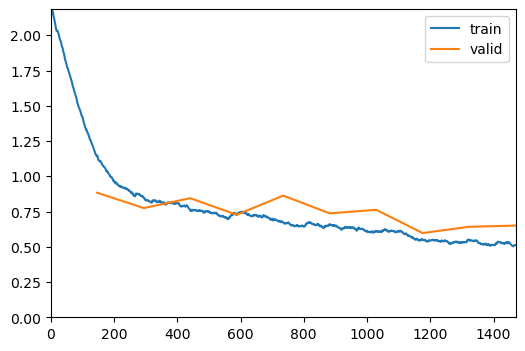

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

loss: 0.65018630027771, accuracy:  75.43%


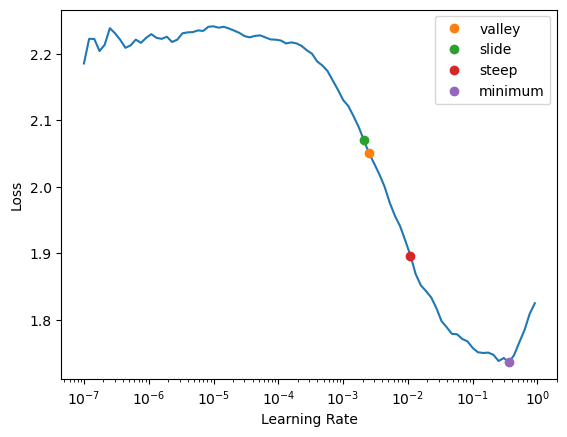

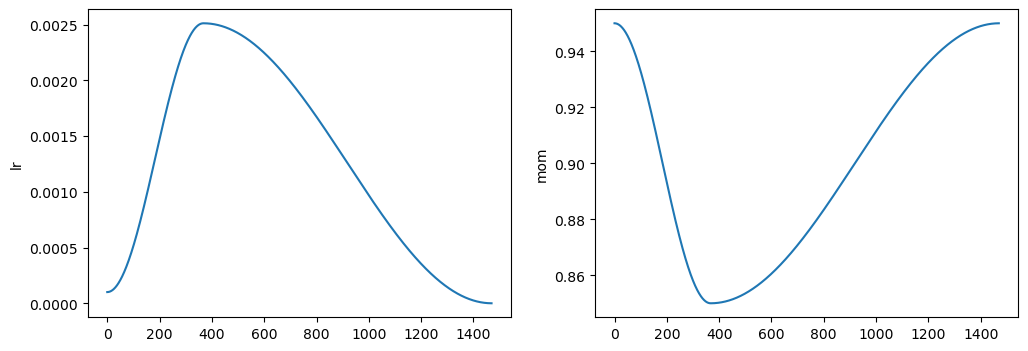

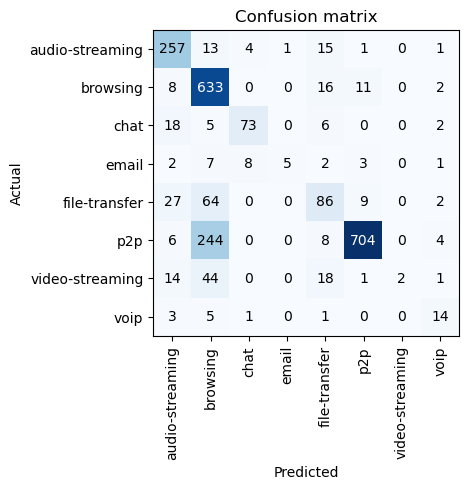

In [8]:
results = run_deep_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type',(100 for _ in range(10)))

Shape of Input Data: (11762, 63)
Layer sizes: [64, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 8], length: 12
Number of residual blocks: 9
Residual locations:  [1, 2, 3, 4, 5, 6, 7, 8, 9]


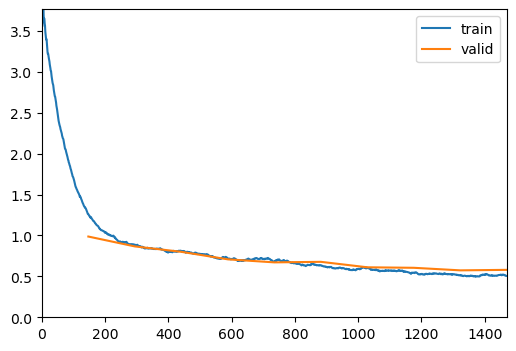

loss: 0.5794238448143005, accuracy:  80.74%


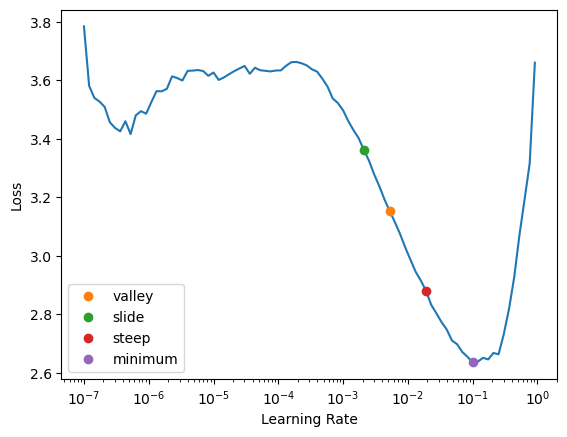

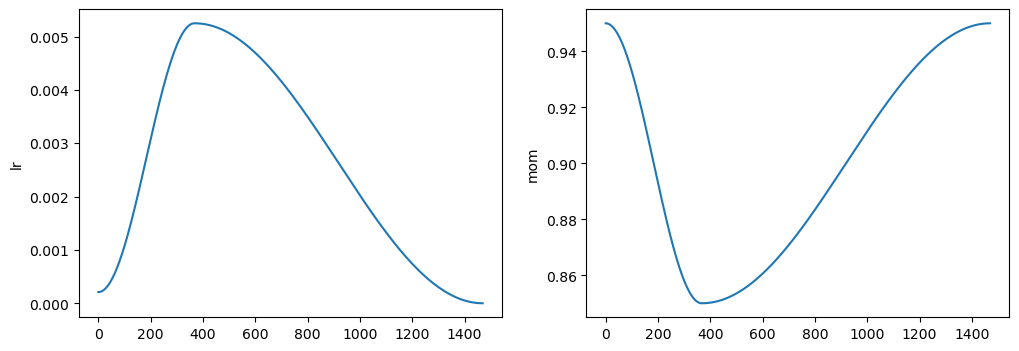

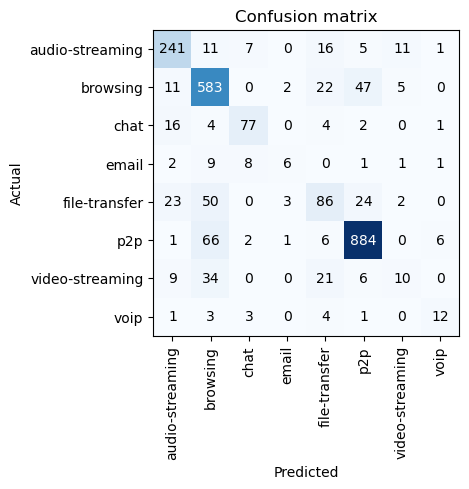

In [9]:
results_res = run_residual_deep_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', (100 for _ in range(10)))

In [9]:
results_sk = run_sk_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type')

Shape of Input Data: (11762, 63)
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       292
           1       0.78      0.90      0.84       670
           2       0.84      0.74      0.79       104
           3       0.71      0.54      0.61        28
           4       0.59      0.48      0.53       188
           5       0.93      0.93      0.93       966
           6       0.53      0.31      0.39        80
           7       0.89      0.67      0.76        24

    accuracy                           0.84      2352
   macro avg       0.77      0.68      0.72      2352
weighted avg       0.83      0.84      0.83      2352

	Accuracy: 0.8397108843537415



In [10]:
class BottleneckResidualBlock(nn.ModuleList):
# class BottleneckResidualBlock(Module):
    '''
        A residule block that creates a skip connection around a set of n branches
            where the number of branches is determined by the number of input modules
            in the branches list parameter.

            the residual connection is put through a linear batchnormed layer if the
            input size is different from the output size
            Then, the output of the branches is summed together along with the possibly transformed input
    '''
    def __init__(self, branches: list, layer: int, in_size: int, out_size: int):
        super().__init__(branches)
        
        self.branches = branches
        self.layer = layer

        self.in_size = in_size
        self.out_size = out_size

        if(in_size != out_size):
            # self.identity_path = nn.Linear(in_size, out_size)
            # self.identity_path = BnReluLin(in_size, out_size)
            self.identity_path = LinBnDrop(in_size, out_size)
        else:
            self.identity_path = Identity()


    def forward(self, inputs):

        fx = self.branches[0](inputs)
        for i in range(len(self.branches) - 1):
            fx += self.branches[i + 1](inputs)

        if(inputs.shape != fx.shape):
            inputs = self.identity_path(inputs)
        return fx + inputs



class Simple_Resnet_Model(nn.Module):
    def __init__(self, input_features=62, layers=[100 for _ in range(10)], output_features=8, config: dict = None, device: str = 'cpu'):
        super().__init__()
        self._layers = []
        _activations = [nn.ReLU(inplace=True) for _ in range(len(layers) - 1)] + [None]

        for i, x in enumerate(layers):
            print(i)
            if (i == 0):
                print(f'i = {i} == 0')
                self._layers.append(BottleneckResidualBlock([LinBnDrop(input_features, layers[i+1], act=_activations[i], lin_first=True)], i, input_features, layers[i+1]))
            elif (i == len(layers) - 1):
                print(f'i = {i} == {len(layers) - 1}')
                self._layers.append(BottleneckResidualBlock([LinBnDrop(x, output_features, act=_activations[i], lin_first=True)], i, x, output_features))
                # self._layers.append(LinBnDrop(x, output_features, act=_activations[i], lin_first=True))
            else:
                self._layers.append(BottleneckResidualBlock([LinBnDrop(x, layers[i+1], act=_activations[i], lin_first=True)], i, x, layers[i+1]))
        
        self.out = nn.Sequential(*self._layers)     
        
    def forward(self, x):
        return self.out(x)



Shape of Input Data: (11762, 63)
0
i = 0 == 0
1
2
3
4
5
6
7
8
9
i = 9 == 9
Parameters in the model: 96678


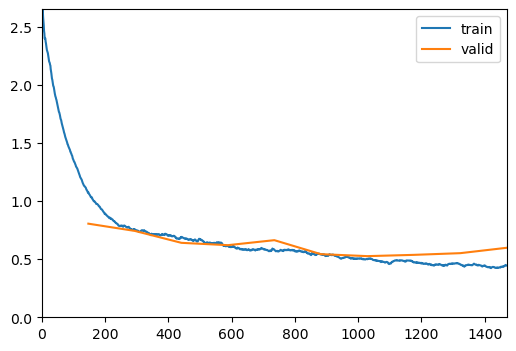

loss: 0.5977877974510193, accuracy:  75.85%


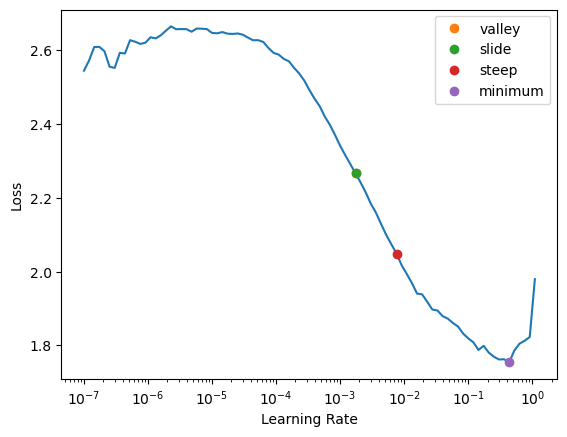

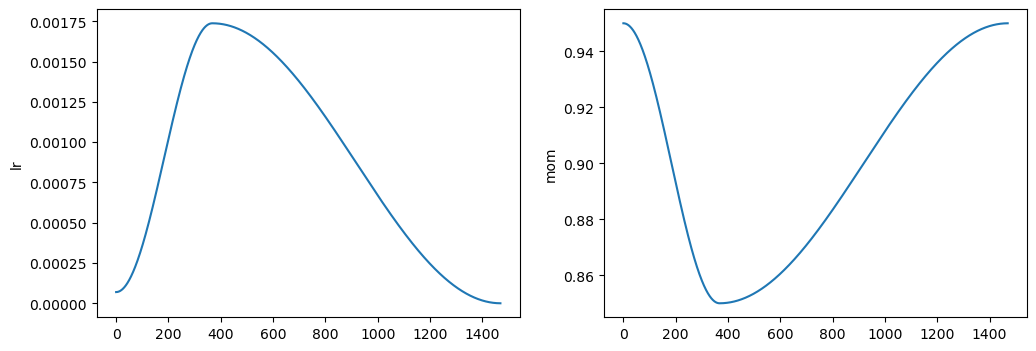

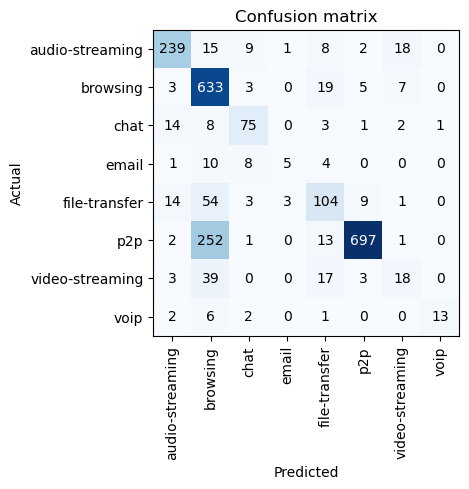

In [11]:
results_simple_res = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Resnet_Model)

In [12]:
class Debug_Module(nn.Module):
    def __init__(self, name: str = 'Debug_Module', layers: list = None):
        super().__init__()

        self.name = name
        self.flag = True

        if layers is not None:
            self.layers = nn.Sequential(*layers)

    def forward(self, x):
        if self.flag:
            print(f'{self.name} - {x.shape}')
            self.flag = False

        return x


In [15]:

model_1 = results.model.model.model
model_2 = results_res.model.model.model
model_3 = results_simple_res.model.model.model
# model_4 = results_simple_filter.model.model.model
# model_5 = results_simple_filter_2.model.model.model
# model_6 = results_simple_filter_3.model.model.model
# model_7 = results_simple_filter_4.model.model.model

print(f"Deep NN 100x10 has \t\t\t{sum(p.numel() for p in model_1.parameters())} parameters")
print(f"Deep Res NN 100x10 has \t\t\t{sum(p.numel() for p in model_2.parameters())} parameters")
print(f"Simple Res NN 100x10 has \t\t{sum(p.numel() for p in model_3.parameters())} parameters")
# print(f"Sparse CNN 1 filter with width 5 has \t{sum(p.numel() for p in model_4.parameters())} parameters")
# print(f"Sparse CNN 1 filter with width 15 has \t{sum(p.numel() for p in model_5.parameters())} parameters")
# print(f"Sparse CNN 1 filter (ReLU) with width 5 has \t{sum(p.numel() for p in model_4.parameters())} parameters")
# print(f"Sparse CNN 1 filter (ReLU) with width 15 has \t{sum(p.numel() for p in model_5.parameters())} parameters")

results_1 = results.model.model.validate()
results_2 = results_res.model.model.validate()
results_3 = results_simple_res.model.model.validate()
# results_4 = results_simple_filter.model.model.validate()
# results_5 = results_simple_filter_2.model.model.validate()
# results_6 = results_simple_filter_3.model.model.validate()
# results_7 = results_simple_filter_4.model.model.validate()

print(f"Deep NN 50x10 has \t\t\t{results_1[1]*100} accuracy")
print(f"Deep Res NN 50x10 has \t\t\t{results_2[1]*100} accuracy")
print(f"Simple Res NN 50x10 has \t\t{results_3[1]*100} accuracy")
# print(f"Sparse CNN 1 filter with width 5 has \t{results_4[1]*100} accuracy")
# print(f"Sparse CNN 1 filter with width 15 has \t{results_5[1]*100} accuracy")
# print(f"Sparse CNN 1 filter (ReLU) with width 5 has \t{results_6[1]*100} accuracy")
# print(f"Sparse CNN 1 filter (ReLU) with width 15 has \t{results_7[1]*100} accuracy")


Deep NN 100x10 has 			99342 parameters
Deep Res NN 100x10 has 			99342 parameters
Simple Res NN 100x10 has 		96678 parameters


Deep NN 50x10 has 			75.42517185211182 accuracy
Deep Res NN 50x10 has 			80.73979616165161 accuracy
Simple Res NN 50x10 has 		75.85033774375916 accuracy


In [16]:
class SparseFilter(nn.Module):
    '''
        A convolutional filter that trains a neighborhood function in each filter to determine the neighborhood of each feature
        input shape: (batch_size, channels, features)
        output shape: (batch_size, filter_width, features)
    
    '''
    def __init__(
        self, 
        features = 62, 
        channels = 1,
        filter_width = 1,
        config: dict = None,
        verbose: bool = False
    ):
        super().__init__()

        self.in_size = features
        self.channels = channels
        self.filter_width = filter_width

        self.sparse_neighborhood = nn.Sequential(
            nn.Linear(features * channels, features, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(features, features, bias=False),
            Sparsemax()
        )

        self.kernel = nn.Sequential(
            nn.Linear(features * channels, self.filter_width, bias=False),
        )

        self.flag: bool = verbose
        self.local_flag: bool = verbose

        
    def forward(self, x):
        if self.flag:
            print('initial shape:\t\t\t', x.shape)

        # Each feature has a sparse neighborhood we can calculate using self.sparse_neighborhood
        # output = torch.zeros(x.shape[0], self.filter_width, self.in_size)
        output = torch.zeros(x.shape[0], self.filter_width, 0)
        
        for i in range(x.shape[2]):

            # first, we extract a single feature x_i and duplicate + concatenate it to match the shape of x, giving us y
            y = torch.cat(tuple((x[:, :, i].reshape(-1, x.shape[1], 1) for _ in range(x.shape[2]))), dim=2)
            if self.local_flag:
                print('conv variable size:\t\t', y.shape, len(y))
            
            if self.local_flag:
                print('input size:\t\t\t', x.shape)


            # next, we calculate the sparse neighborhood of y
            nb = self.sparse_neighborhood((x - y).reshape(x.shape[0], -1))
            
            if self.local_flag:
                print("neighborhood:\t\t\t", nb.shape)
                print('neighborhood contents:')
                print(nb)

            # we create a mask of the same shape as x, but one that has the sparse neighborhood of x_i
            mask = torch.cat(tuple((nb.reshape(nb.shape[0], 1, -1) for _ in range(x.shape[1]))), dim=1)

            if self.local_flag:
                print('mask size: \t\t\t', mask.shape)
                # print('mask contents:')
                # print(mask)


            # we extract the sparse neighborhood of x_i from x
            xm = x * mask

            if self.local_flag:
                print('masked input:\t\t\t', xm.shape)
                # print('masked input contents:')
                # print(xm)

            # finally, we perform the convolution using the kernel on the sparse neighborhood of x_i
            output_i = self.kernel(xm.reshape(x.shape[0], -1)).reshape(x.shape[0], -1, 1)

            if self.local_flag:
                print('output:\t\t\t\t', output.shape)
                print('output_i:\t\t\t', output_i.shape)
                print('output_i contents:')
                print(output_i)

                self.local_flag = False

            # to finish, we concatenate the output for this x_i to the output tensor
            output = torch.cat((output, output_i), dim=2)

        if self.flag:
            print("post-run - sparse filter:\t", output.shape)
            self.flag = False

        return output



batch_size = 1
features = 4
channels = 1
filter_width = 2


test_vals = torch.randn(batch_size, channels, features)

test_filter = SparseFilter(features=features, filter_width=filter_width, channels=channels, verbose=True)
print(f"Sparse filter with input shape {test_vals.shape} and filter_width {filter_width} has {sum(p.numel() for p in test_filter.parameters())} parameters")
test_filter(test_vals)

Sparse filter with input shape torch.Size([1, 1, 4]) and filter_width 2 has 40 parameters
initial shape:			 torch.Size([1, 1, 4])
conv variable size:		 torch.Size([1, 1, 4]) 1
input size:			 torch.Size([1, 1, 4])
neighborhood:			 torch.Size([1, 4])
neighborhood contents:
tensor([[0.3026, 0.1972, 0.3205, 0.1798]], grad_fn=<SparsemaxFunctionBackward>)
mask size: 			 torch.Size([1, 1, 4])
masked input:			 torch.Size([1, 1, 4])
output:				 torch.Size([1, 2, 0])
output_i:			 torch.Size([1, 2, 1])
output_i contents:
tensor([[[0.0201],
         [0.1577]]], grad_fn=<ReshapeAliasBackward0>)
post-run - sparse filter:	 torch.Size([1, 2, 4])


tensor([[[0.0201, 0.0959, 0.1043, 0.0726],
         [0.1577, 0.0572, 0.0503, 0.0817]]], grad_fn=<CatBackward0>)

In [17]:
class DifferentiableMask(nn.Module):
    '''
        A differentiable mask that can be trained to mask out features in a feature vector

        parameters:
            input_size: the size of the input feature vector
            output_size: the size of the output feature vector

        input shape: (batch_size, input_size)
        output shape: (batch_size, output_size)
    '''

    def __init__(
        self,
        input_size: int = 32,
        output_size: int = 64,
        config: dict = None,
    ):
        super().__init__()

        self.mask_network = None
        self.activation = Sparsemax()

        if config is not None:
            if 'mask_network' in config:
                self.mask_network = config['mask_network']
            if 'activation' in config:
                self.activation = config['activation']
            
            
        if self.mask_network is None:
            self.mask_network = nn.Sequential(
                nn.Linear(input_size, output_size),
                nn.ReLU(),
                nn.Linear(output_size, output_size),
                self.activation
            )

        else:
            self.mask_network = nn.Sequential(
                self.mask_network(input_size, output_size),
                self.activation
            )


    def forward(self, x):
        
        return self.mask_network(x)



class DifferenceMask(nn.Module):
    '''
        A differentiable mask that uses a difference vector as input to find a mask

        The difference vector is calculated for each feature in the input vector
            by subtracting the vector of duplicates of that feature 


        input shape: (batch_size, channels, features)
        output shape: (batch_size, channels, features)
    '''

    def __init__(
        self,
        features: int = 64,
        channels: int = 4,
        config: dict = None,
        verbose: bool = False,
    ):
        super().__init__()

        self.differentiable_mask = DifferentiableMask(input_size=features * channels, output_size=features, config=config)


    def forward(self, x, i):
        batch_size, channels, features = x.shape

        

        y = x[:, :, i].reshape(batch_size, channels, 1).repeat(1, 1, features)
        x_hat = x - y

        # we can now calculate the sparse neighborhood of each feature in x
        #   by passing x_hat through self.differentiable_mask

        x_mask = self.differentiable_mask(x_hat.reshape(batch_size, -1)).reshape(batch_size, 1, -1)

        return x_mask.repeat(1, channels, 1)


    # def forward(self, x):

    #     batch_size, channels, features = x.shape

    #     y = torch.cat(tuple((x[:, :, i].reshape(batch_size, channels, 1).repeat(1, 1, features) for i in range(features))), dim=0)
    #     x = x.repeat(features, 1, 1)

    #     x_hat = x - y

    #     # we can now calculate the sparse neighborhood of each feature in x
    #     #   by passing x_hat through self.differentiable_mask

    #     x_mask = self.differentiable_mask(x_hat.reshape(batch_size * features, -1)).reshape(batch_size, 1, features)

    #     return x_mask.repeat(1, channels, 1)
        



class PositionalMask(nn.Module):
    '''
        A differentiable mask that uses a positional encoding as input to find a mask
            
        This network does not take an input after configuration, but produces a positional encoding
            that can be used as input to a differential mask network
    '''

    types = ['independent', 'linear', 'circular']

    def __init__(
        self,
        masks: int = 32,
        size: int = 64,
        type: str = 'independent',
        config: dict = None,
        verbose: bool = False
    ):

        super().__init__()

        self.type = type
        self.masks = masks
        self.size = size
        self.verbose = verbose

        self.positional_encoding = None
        self.mask_input_shape = None

        if type not in self.types:
            raise ValueError(f"Positional mask type must be one of {self.types}")

        elif type == 'independent':
            # we produce a binary matrix of size (masks, masks) where the diagonal is all 1s and the rest are 0s
            #       this gives us a set of linearly independent vectors,
            #       meaning we train our mask to be a graph homomorphism taking unit vertices to the masking vertices 
            #       (i.e. the rows of the matrix)

            self.positional_encoding = torch.eye(masks, masks)
            self.mask_input_shape = (masks, masks)

        elif type == 'linear':
            # we produce a matrix of size (masks, 1) of the form [[0], [1/(m-1)], [2/(m-1)], ..., [1]]
            #       this gives us a set of points on the line from 0 to 1, 
            #       meaning we train our mask to be a path from 0 to 1

            self.positional_encoding = torch.arange(masks).reshape(-1, 1) / (masks - 1)
            self.mask_input_shape = (masks, 1)
            
        elif type == 'circular':
            # we produce a matrix of size (masks, 1) of the form [[0], [1/m], [2/m], ..., [(m-1)/m]]
            #       then we pass them through the unit circle function to get the circular encoding
            #       this finally gives us a matrix of size (masks, 2), 
            #       meaning we train our mask to be a loop parametrized by the unit circle

            pi = torch.tensor(math.pi)
            self.positional_encoding = torch.arange(masks).reshape(-1, 1) / masks
            self.positional_encoding = torch.cat((torch.cos(self.positional_encoding * 2 * pi), torch.sin(self.positional_encoding * 2 * pi)), dim=1)
            self.mask_input_shape = (masks, 2)


        self.differentiable_mask = DifferentiableMask(input_size=self.mask_input_shape[1], output_size=size, config=config)

        

    def forward(self, x):
        batch_size = x.shape[0]
        channels = x.shape[1]

        out: torch.Tensor = self.differentiable_mask(self.positional_encoding) 

        out = out.reshape(1, 1, -1)

        # we now duplicate the output for each batch and channel
        out = out.repeat(batch_size, channels, 1)


        return out




In [18]:
class SparseFilter1(nn.Module):
    '''
        A convolutional filter that trains a neighborhood function in each filter to determine the neighborhood of each feature
        input shape: (batch_size, channels, features)
        output shape: (batch_size, filter_width, features)
    
    '''
    def __init__(
        self, 
        features = 62, 
        channels = 1,
        filter_width = 1,
        config: dict = None,
        verbose: bool = False
    ):
        super().__init__()

        self.in_size = features
        self.channels = channels
        self.filter_width = filter_width

        self.neighborhood = DifferenceMask(features=features, channels=channels, config=config, verbose=verbose)

        self.kernel = nn.Sequential(
            nn.Linear(features * channels, self.filter_width, bias=False),
        )

        self.flag: bool = verbose
        self.local_flag: bool = verbose

        
    def forward(self, x):
        if self.flag:
            print('initial shape:\t\t\t', x.shape)

        # Each feature has a sparse neighborhood we can calculate using self.sparse_neighborhood
        # output = torch.zeros(x.shape[0], self.filter_width, self.in_size)
        output = torch.zeros(x.shape[0], self.filter_width, 0)
        
        for i in range(x.shape[2]):

            mask = self.neighborhood(x, i)

            if self.local_flag:
                print('mask size: \t\t\t', mask.shape)
                print('mask contents:')
                print(mask)


            # we extract the sparse neighborhood of x_i from x
            xm = x * mask

            if self.local_flag:
                print('masked input:\t\t\t', xm.shape)
                print('masked input contents:')
                print(xm)

            # finally, we perform the convolution using the kernel on the sparse neighborhood of x_i
            output_i = self.kernel(xm.reshape(x.shape[0], -1)).reshape(x.shape[0], -1, 1)

            if self.local_flag:
                print('output:\t\t\t\t', output.shape)
                print('output_i:\t\t\t', output_i.shape)
                print('output_i contents:')
                print(output_i)

                self.local_flag = False

            # to finish, we concatenate the output for this x_i to the output tensor
            output = torch.cat((output, output_i), dim=2)

        if self.flag:
            print("post-run - sparse filter:\t", output.shape)
            self.flag = False

        return output



batch_size = 2
features = 4
channels = 5
filter_width = 3


test_vals = torch.randn(batch_size, channels, features)

test_filter = SparseFilter1(features=features, filter_width=filter_width, channels=channels, verbose=True)
print(f"Sparse filter with input shape {test_vals.shape} and filter_width {filter_width} has {sum(p.numel() for p in test_filter.parameters())} parameters")
test_filter(test_vals)

Sparse filter with input shape torch.Size([2, 5, 4]) and filter_width 3 has 164 parameters
initial shape:			 torch.Size([2, 5, 4])
mask size: 			 torch.Size([2, 5, 4])
mask contents:
tensor([[[0.4018, 0.0000, 0.0597, 0.5385],
         [0.4018, 0.0000, 0.0597, 0.5385],
         [0.4018, 0.0000, 0.0597, 0.5385],
         [0.4018, 0.0000, 0.0597, 0.5385],
         [0.4018, 0.0000, 0.0597, 0.5385]],

        [[0.4333, 0.0000, 0.0816, 0.4851],
         [0.4333, 0.0000, 0.0816, 0.4851],
         [0.4333, 0.0000, 0.0816, 0.4851],
         [0.4333, 0.0000, 0.0816, 0.4851],
         [0.4333, 0.0000, 0.0816, 0.4851]]], grad_fn=<RepeatBackward0>)
masked input:			 torch.Size([2, 5, 4])
masked input contents:
tensor([[[ 0.1523, -0.0000,  0.0684,  0.3570],
         [-0.3808, -0.0000, -0.0445, -0.9688],
         [ 0.2217,  0.0000,  0.0663,  0.1488],
         [ 0.0490, -0.0000,  0.0199,  0.0050],
         [ 0.5125,  0.0000, -0.0343, -0.6207]],

        [[ 0.1442, -0.0000, -0.0059, -0.0326],
         [

tensor([[[ 0.0479,  0.0239,  0.1957,  0.1547],
         [-0.3563, -0.3329, -0.3371, -0.2691],
         [ 0.0414,  0.0651, -0.0347, -0.0608]],

        [[-0.0145, -0.0262, -0.0203, -0.0254],
         [ 0.0394,  0.0156,  0.0434,  0.0379],
         [-0.1062, -0.0782, -0.0969, -0.1024]]], grad_fn=<CatBackward0>)

In [19]:

batch_size = 2
channels = 2
features = 3


# test_vals = torch.randn(batch_size, channels, features)
# print(test_vals)
# test_vals = test_vals.resize(batch_size, features, channels, 1)
# # .resize(batch_size, channels, features, 1)
# print(test_vals)
# test_vals = test_vals.repeat(1, 1, 1, features)
# print(test_vals)
# # test_vals.repeat(2, 3,1)

test_vals = torch.randn(batch_size, channels, features)
print(test_vals)
feature_range = list(range(features))


# tv_1 = test_vals[:, :, 0].reshape(batch_size, channels, 1).repeat(1, 1, features)
# print(tv_1)
# test_vals[:, :, feature_range]

# test_vals.reshape(1, batch_size, channels, features).repeat(features, 1, 1, 1)
# test_vals.reshape(batch_size, 1, channels, features).repeat(1, features, 1, 1)
# test_vals.reshape(batch_size, channels, 1, features).repeat(1, 1, features, 1)
# test_vals.reshape(batch_size, channels, features, 1).repeat(1, 1, 1, features)

# tv = torch.cat(tuple((test_vals[:, :, i].reshape(batch_size, channels, 1) for i in feature_range)), dim=2)
# tv


# tv_1 = test_vals[:, :, 0].reshape(batch_size, channels, 1).repeat(1, 1, features)
# print(tv_1)

tv = torch.cat(tuple((test_vals[:, :, i].reshape(batch_size, channels, 1).repeat(1, 1, features) for i in range(features))), dim=0)
print(tv)

print(test_vals.repeat(  ) - tv)

tensor([[[ 0.4651, -0.0197, -2.1911],
         [-1.4020, -0.5970,  0.2565]],

        [[ 1.2516,  0.0672,  0.6673],
         [ 0.5503, -0.6489, -0.2186]]])
tensor([[[ 0.4651,  0.4651,  0.4651],
         [-1.4020, -1.4020, -1.4020]],

        [[ 1.2516,  1.2516,  1.2516],
         [ 0.5503,  0.5503,  0.5503]],

        [[-0.0197, -0.0197, -0.0197],
         [-0.5970, -0.5970, -0.5970]],

        [[ 0.0672,  0.0672,  0.0672],
         [-0.6489, -0.6489, -0.6489]],

        [[-2.1911, -2.1911, -2.1911],
         [ 0.2565,  0.2565,  0.2565]],

        [[ 0.6673,  0.6673,  0.6673],
         [-0.2186, -0.2186, -0.2186]]])


TypeError: repeat() missing 1 required positional arguments: "repeats"

In [ ]:
# we extract the support vector (a vector of all values not 0) from tv

sp_tv =

In [20]:


class SparseFilter2(nn.Module):
    '''
        A convolutional filter that trains a neighborhood function in each filter to determine the neighborhood of each feature
        input shape: (batch_size, channels, features)
        output shape: (batch_size, filter_width, features)
    
    '''
    def __init__(
        self, 
        features = 62, 
        channels = 1,
        filter_width = 1,
        config: dict = None,
        verbose: bool = False
    ):
        super().__init__()

        self.in_size = features
        self.channels = channels
        self.filter_width = filter_width

        self.sparse_neighborhood = nn.Sequential(
            nn.Linear(features * channels, features, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(features, features, bias=False),
            Sparsemax()
        )

        self.kernel = nn.Sequential(
            nn.Linear(features * channels, self.filter_width, bias=False),
        )

        self.flag: bool = verbose
        self.local_flag: bool = verbose

        
    def forward(self, x):
        if self.flag:
            print('initial shape:\t\t\t', x.shape)

        # Each feature has a sparse neighborhood we can calculate using self.sparse_neighborhood
        # output = torch.zeros(x.shape[0], self.filter_width, self.in_size)
        output = torch.zeros(x.shape[0], self.filter_width, 0)
        
        for i in range(x.shape[2]):

            # first, we extract a single feature x_i and duplicate + concatenate it to match the shape of x, giving us y
            y = torch.cat(tuple((x[:, :, i].reshape(-1, x.shape[1], 1) for _ in range(x.shape[2]))), dim=2)
            if self.local_flag:
                print('conv variable size:\t\t', y.shape, len(y))
            
            if self.local_flag:
                print('input size:\t\t\t', x.shape)


            # next, we calculate the sparse neighborhood of y
            nb = self.sparse_neighborhood((x - y).reshape(x.shape[0], -1))
            
            if self.local_flag:
                print("neighborhood:\t\t\t", nb.shape)
                print('neighborhood contents:')
                print(nb)

            # we create a mask of the same shape as x, but one that has the sparse neighborhood of x_i
            mask = torch.cat(tuple((nb.reshape(nb.shape[0], 1, -1) for _ in range(x.shape[1]))), dim=1)

            if self.local_flag:
                print('mask size: \t\t\t', mask.shape)
                # print('mask contents:')
                # print(mask)


            # we extract the sparse neighborhood of x_i from x
            xm = x * mask

            if self.local_flag:
                print('masked input:\t\t\t', xm.shape)
                # print('masked input contents:')
                # print(xm)

            # finally, we perform the convolution using the kernel on the sparse neighborhood of x_i
            output_i = self.kernel(xm.reshape(x.shape[0], -1)).reshape(x.shape[0], -1, 1)

            if self.local_flag:
                print('output:\t\t\t\t', output.shape)
                print('output_i:\t\t\t', output_i.shape)
                print('output_i contents:')
                print(output_i)

                self.local_flag = False

            # to finish, we concatenate the output for this x_i to the output tensor
            output = torch.cat((output, output_i), dim=2)

        if self.flag:
            print("post-run - sparse filter:\t", output.shape)
            self.flag = False

        return output



batch_size = 1
features = 4
channels = 1
filter_width = 2


test_vals = torch.randn(batch_size, channels, features)

test_filter = SparseFilter2(features=features, filter_width=filter_width, channels=channels, verbose=True)
print(f"Sparse filter with input shape {test_vals.shape} and filter_width {filter_width} has {sum(p.numel() for p in test_filter.parameters())} parameters")
test_filter(test_vals)

Sparse filter with input shape torch.Size([1, 1, 4]) and filter_width 2 has 40 parameters
initial shape:			 torch.Size([1, 1, 4])
conv variable size:		 torch.Size([1, 1, 4]) 1
input size:			 torch.Size([1, 1, 4])
neighborhood:			 torch.Size([1, 4])
neighborhood contents:
tensor([[0.3604, 0.2813, 0.0908, 0.2675]], grad_fn=<SparsemaxFunctionBackward>)
mask size: 			 torch.Size([1, 1, 4])
masked input:			 torch.Size([1, 1, 4])
output:				 torch.Size([1, 2, 0])
output_i:			 torch.Size([1, 2, 1])
output_i contents:
tensor([[[-0.1823],
         [ 0.1164]]], grad_fn=<ReshapeAliasBackward0>)
post-run - sparse filter:	 torch.Size([1, 2, 4])


tensor([[[-0.1823, -0.1768, -0.1543, -0.1569],
         [ 0.1164,  0.1123,  0.0975,  0.0984]]], grad_fn=<CatBackward0>)

In [21]:


class SparseFilter(nn.Module):
    '''
        A convolutional filter that trains a neighborhood function in each filter to determine the neighborhood of each feature
        input shape: (batch_size, channels, features)
        output shape: (batch_size, filter_width, features)
    
    '''
    def __init__(
        self, 
        features = 62, 
        channels = 1,
        filter_width = 1,
        config: dict = None,
        verbose: bool = False
    ):
        super().__init__()

        self.in_size = features
        self.channels = channels
        self.filter_width = filter_width

        self.sparse_neighborhood = nn.Sequential(
            nn.Linear(features * channels, features, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(features, features, bias=False),
            Sparsemax()
        )

        self.kernel = nn.Sequential(
            nn.Linear(features * channels, self.filter_width, bias=False),
        )

        self.flag: bool = verbose
        self.local_flag: bool = verbose

        
    def forward(self, x):
        if self.flag:
            print('initial shape:\t\t\t', x.shape)

        # Each feature has a sparse neighborhood we can calculate using self.sparse_neighborhood
        # output = torch.zeros(x.shape[0], self.filter_width, self.in_size)
        output = torch.zeros(x.shape[0], self.filter_width, 0)
        
        for i in range(x.shape[2]):

            # first, we extract a single feature x_i and duplicate + concatenate it to match the shape of x, giving us y
            y = torch.cat(tuple((x[:, :, i].reshape(-1, x.shape[1], 1) for _ in range(x.shape[2]))), dim=2)
            if self.local_flag:
                print('conv variable size:\t\t', y.shape, len(y))
            
            if self.local_flag:
                print('input size:\t\t\t', x.shape)


            # next, we calculate the sparse neighborhood of y
            nb = self.sparse_neighborhood((x - y).reshape(x.shape[0], -1))
            
            if self.local_flag:
                print("neighborhood:\t\t\t", nb.shape)
                print('neighborhood contents:')
                print(nb)

            # we create a mask of the same shape as x, but one that has the sparse neighborhood of x_i
            mask = torch.cat(tuple((nb.reshape(nb.shape[0], 1, -1) for _ in range(x.shape[1]))), dim=1)

            if self.local_flag:
                print('mask size: \t\t\t', mask.shape)
                # print('mask contents:')
                # print(mask)


            # we extract the sparse neighborhood of x_i from x
            xm = x * mask

            if self.local_flag:
                print('masked input:\t\t\t', xm.shape)
                print('masked input contents:')
                print(xm)

            # finally, we perform the convolution using the kernel on the sparse neighborhood of x_i
            output_i = self.kernel(xm.reshape(x.shape[0], -1)).reshape(x.shape[0], -1, 1)

            if self.local_flag:
                print('output:\t\t\t\t', output.shape)
                print('output_i:\t\t\t', output_i.shape)
                print('output_i contents:')
                print(output_i)

                self.local_flag = False

            # to finish, we concatenate the output for this x_i to the output tensor
            output = torch.cat((output, output_i), dim=2)

        if self.flag:
            print("post-run - sparse filter:\t", output.shape)
            self.flag = False

        return output



class SparseFilter1(nn.Module):
    '''
        A convolutional filter that trains a neighborhood function in each filter to determine the neighborhood of each feature
        input shape: (batch_size, channels, features)
        output shape: (batch_size, filter_width, features)
    
    '''
    def __init__(
        self, 
        features = 62, 
        channels = 1,
        filter_width = 1,
        config: dict = None,
        verbose: bool = False
    ):
        super().__init__()

        self.in_size = features
        self.channels = channels
        self.filter_width = filter_width

        self.neighborhood = DifferenceMask()

        self.kernel = nn.Sequential(
            nn.Linear(features * channels, self.filter_width, bias=False),
        )

        self.flag: bool = verbose
        self.local_flag: bool = verbose

        
    def forward(self, x):
        if self.flag:
            print('initial shape:\t\t\t', x.shape)

        # Each feature has a sparse neighborhood we can calculate using self.sparse_neighborhood
        # output = torch.zeros(x.shape[0], self.filter_width, self.in_size)
        output = torch.zeros(x.shape[0], self.filter_width, 0)
        
        for i in range(x.shape[2]):

            mask = self.neighborhood(x, i)

            if self.local_flag:
                print('mask size: \t\t\t', mask.shape)
                # print('mask contents:')
                # print(mask)


            # we extract the sparse neighborhood of x_i from x
            xm = x * mask

            if self.local_flag:
                print('masked input:\t\t\t', xm.shape)
                print('masked input contents:')
                print(xm)

            # finally, we perform the convolution using the kernel on the sparse neighborhood of x_i
            output_i = self.kernel(xm.reshape(x.shape[0], -1)).reshape(x.shape[0], -1, 1)

            if self.local_flag:
                print('output:\t\t\t\t', output.shape)
                print('output_i:\t\t\t', output_i.shape)
                print('output_i contents:')
                print(output_i)

                self.local_flag = False

            # to finish, we concatenate the output for this x_i to the output tensor
            output = torch.cat((output, output_i), dim=2)

        if self.flag:
            print("post-run - sparse filter:\t", output.shape)
            self.flag = False

        return output



batch_size = 2
features = 4
channels = 5
filter_width = 3


test_vals = torch.randn(batch_size, channels, features)

test_filter = SparseFilter1(features=features, filter_width=filter_width, channels=channels, verbose=True)
print(f"Sparse filter with input shape {test_vals.shape} and filter_width {filter_width} has {sum(p.numel() for p in test_filter.parameters())} parameters")
test_filter(test_vals)

Sparse filter with input shape torch.Size([2, 5, 4]) and filter_width 3 has 20668 parameters
initial shape:			 torch.Size([2, 5, 4])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x20 and 256x64)

In [22]:



class SparseConv(nn.Module):
    '''
        A convolutional layer that trains a neighborhood function in each filter to determine the neighborhood of each feature
        input shape: (batch_size, channels, features)
        output shape: (batch_size, filters * filter_width, features)
    '''
    def __init__(
        self, 
        features = 62, 
        channels = 1,
        filters = 1,
        filter_width = 1,
        config: dict = None,
        verbose: bool = False
    ):
        super().__init__()

        self.in_size = features
        self.channels = channels
        self.num_filters = filters
        self.filter_width = filter_width

        self.filters = nn.ModuleList([
            SparseFilter(features=features, channels=channels, filter_width=filter_width)
            for _ in range(filters)
        ])

        self.flag: bool = verbose
        self.local_flag: bool = verbose

        
    def forward(self, x):
        if self.flag:
            print('initial shape:\t\t\t', x.shape)

        # We run each filter on the input in parallel
        output = torch.cat(tuple((filter(x) for filter in self.filters)), dim=1)


        if self.flag:
            print("post-run - sparse conv:\t", output.shape)
            self.flag = False

        return output




batch_size = 2
features = 4
channels = 2
filter_width = 3
filters = 2


test_vals = torch.randn(batch_size, channels, features)

test_filter = SparseConv(features=features, channels=channels, filters=filters, filter_width=filter_width, verbose=True)
print(f"Sparse filter with input shape {test_vals.shape} and filter_width {filter_width} has {sum(p.numel() for p in test_filter.parameters())} parameters")
test_filter(test_vals)

Sparse filter with input shape torch.Size([2, 2, 4]) and filter_width 3 has 144 parameters
initial shape:			 torch.Size([2, 2, 4])
post-run - sparse conv:	 torch.Size([2, 6, 4])


tensor([[[-0.4963, -0.0719,  0.3242, -0.4993],
         [-0.0465,  0.1438,  0.2340, -0.0468],
         [-0.0127, -0.0401, -0.0547, -0.0158],
         [ 0.3558,  0.3889,  0.3572,  0.3021],
         [ 0.0727,  0.0138,  0.0425,  0.1235],
         [-0.1309, -0.0956, -0.1054, -0.1494]],

        [[ 0.0350,  0.4552,  0.3066,  0.1180],
         [ 0.0171,  0.0918,  0.0339,  0.0206],
         [ 0.0484, -0.0309,  0.0218,  0.0428],
         [-0.1677, -0.0991, -0.0999, -0.1509],
         [-0.0089, -0.0149, -0.0026, -0.0030],
         [ 0.2486,  0.2425,  0.2293,  0.2397]]], grad_fn=<CatBackward0>)

Shape of Input Data: (11762, 63)
Parameters in the model: 11214


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 5, 64])
post-flatten - torch.Size([64, 320])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


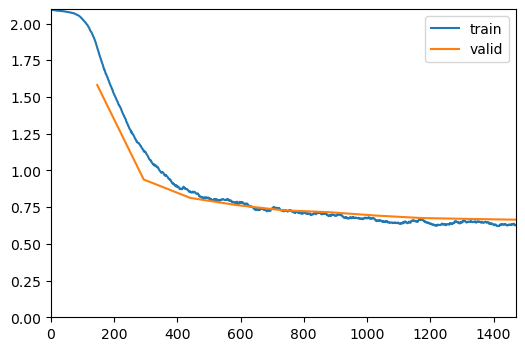

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.6645737290382385, accuracy:  78.10%


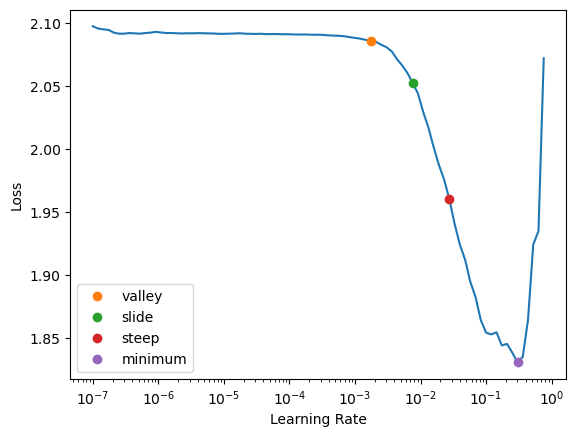

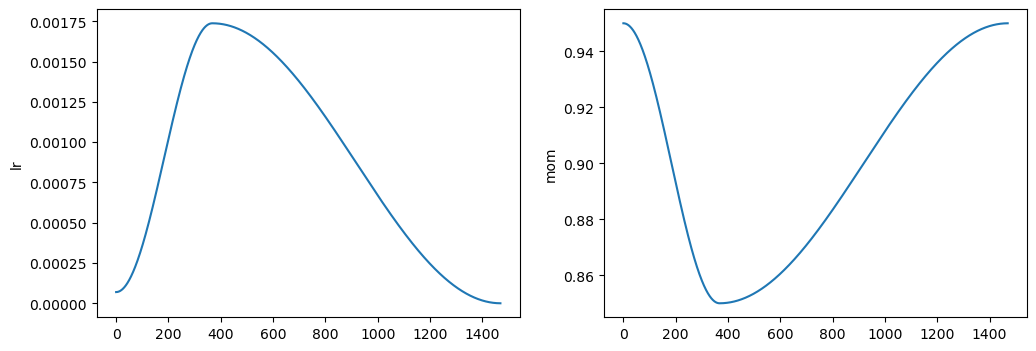

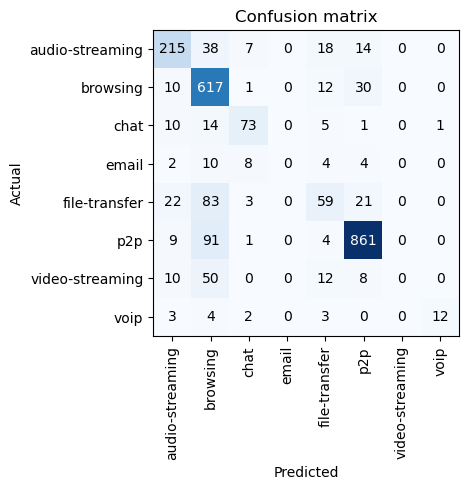

In [23]:

        

class SparseCNN(nn.Module):
    def __init__(self, input_features = 62, output_features = 8, device = 'cpu', config: dict = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 5
            },
        ],
        # 'fc_layers': [
        #     50 for _ in range(3)
        # ]
    }):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features

        conv_layers = []

        for i, layer in enumerate(config['conv_layers']):
            channels = 1 if i == 0 else conv_layers[i-1].num_filters * conv_layers[i-1].filter_width

            conv_layers.append(
                SparseConv(
                    features=input_features, 
                    channels=channels,
                    filters=layer['filters'], 
                    filter_width=layer['filter_width']
                )
            )

        layers = []

        for layer in conv_layers:
            layers.append(layer)
            layers.append(nn.ReLU())


        self.layers = nn.Sequential(
            *layers,
            Debug_Module('pre-flatten'),
            nn.Flatten(),
            Debug_Module('post-flatten'),
            nn.Linear(conv_layers[-1].num_filters * conv_layers[-1].filter_width * self.input_features, output_features)
        )

        self.flag: bool = True


    def forward(self, x):
        if self.flag:
            print('Pre-run: simple_model -', x.shape)

        x = x.reshape(x.shape[0], 1, -1)
        if self.flag:
            print("reshaped: simple_model -", x.shape)

        x = self.layers(x)

        if self.flag:
            print('Post-run: simple_model -', x.shape)
            self.flag = False

        # raise Exception('stop')
        return x

results_sparse_cnn_1 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN, 
    config = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 5
            },
        ],
    }
)


Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 2, 64])
post-flatten - torch.Size([64, 128])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


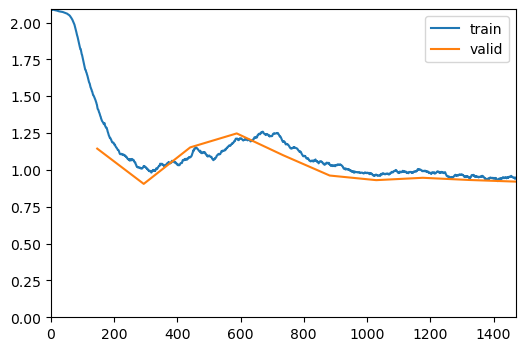

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.9205905795097351, accuracy:  69.52%


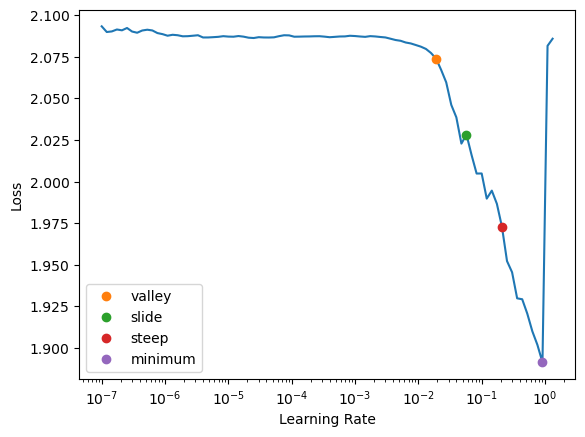

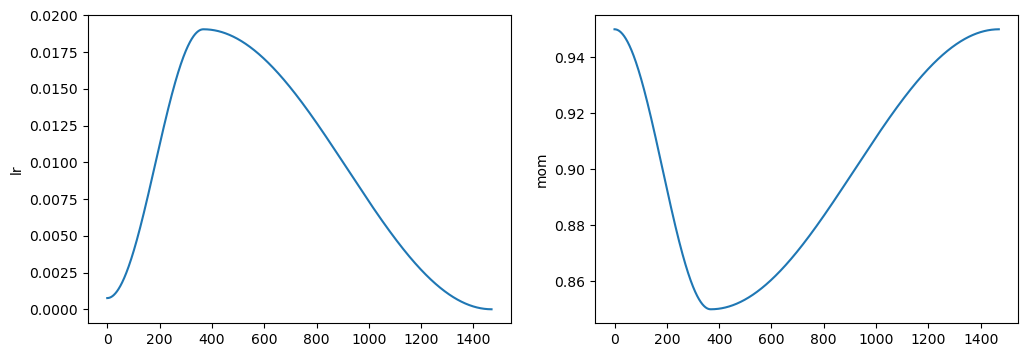

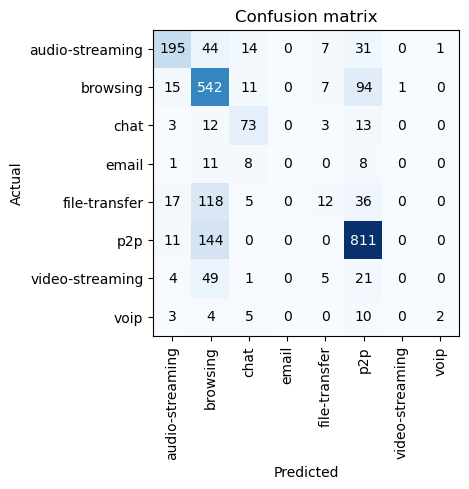

In [35]:

results_sparse_cnn = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 2
            },
            {
                'filters': 1,
                'filter_width': 2
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 6, 64])
post-flatten - torch.Size([64, 384])
Post-run: simple_model - torch.Size([64, 8])


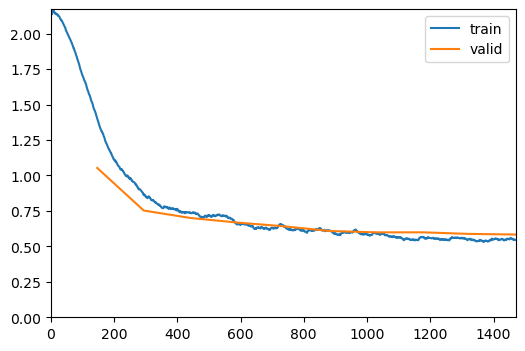

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5835690498352051, accuracy:  80.14%


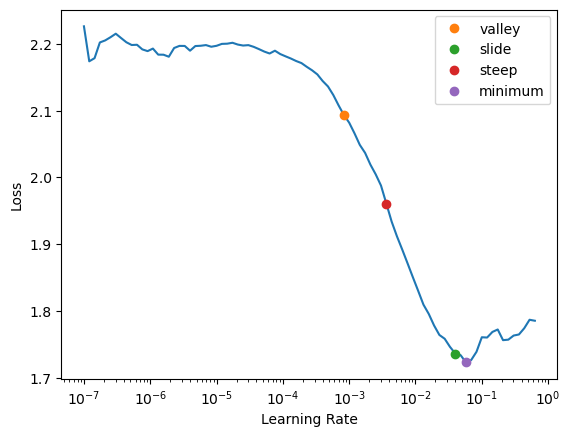

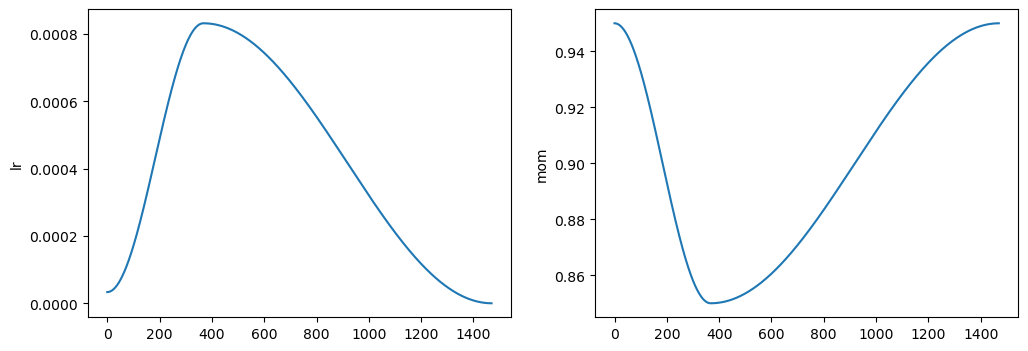

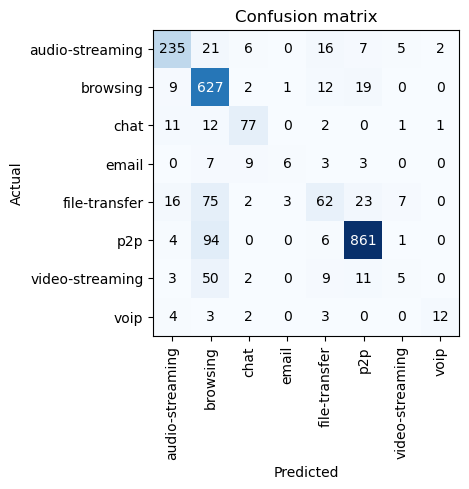

In [38]:

        

class SparseCNN_Normed(nn.Module):
    def __init__(self, input_features = 62, output_features = 8, device = 'cpu', config: dict = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 5
            },
        ],
        # 'fc_layers': [
        #     50 for _ in range(3)
        # ]
    }):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features

        conv_layers = []

        for i, layer in enumerate(config['conv_layers']):
            channels = 1 if i == 0 else conv_layers[i-1].num_filters * conv_layers[i-1].filter_width

            conv_layers.append(
                SparseConv(
                    features=input_features, 
                    channels=channels,
                    filters=layer['filters'], 
                    filter_width=layer['filter_width']
                )
            )

        layers = []

        for layer in conv_layers:
            # channels = 1 if i == 0 else layers[i-1].num_filters * layers[i-1].filter_width
            channels = layer.num_filters * layer.filter_width
            layers.append(layer)
            # layers.append(nn.ReLU())
            layers.append(
                nn.GroupNorm(channels, channels)
            )


        self.layers = nn.Sequential(
            *layers,
            Debug_Module('pre-flatten'),
            nn.Flatten(),
            Debug_Module('post-flatten'),
            nn.Linear(conv_layers[-1].num_filters * conv_layers[-1].filter_width * self.input_features, output_features)
        )

        self.flag: bool = True


    def forward(self, x):
        if self.flag:
            print('Pre-run: simple_model -', x.shape)

        x = x.reshape(x.shape[0], 1, -1)
        if self.flag:
            print("reshaped: simple_model -", x.shape)

        x = self.layers(x)

        if self.flag:
            print('Post-run: simple_model -', x.shape)
            self.flag = False

        # raise Exception('stop')
        return x

results_sparse_cnn_1 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed, 
    config = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 6
            },
        ],
    }
)


Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 6, 64])
post-flatten - torch.Size([64, 384])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


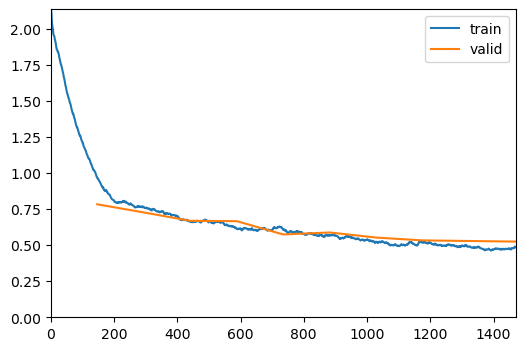

loss: 0.524849534034729, accuracy:  81.76%


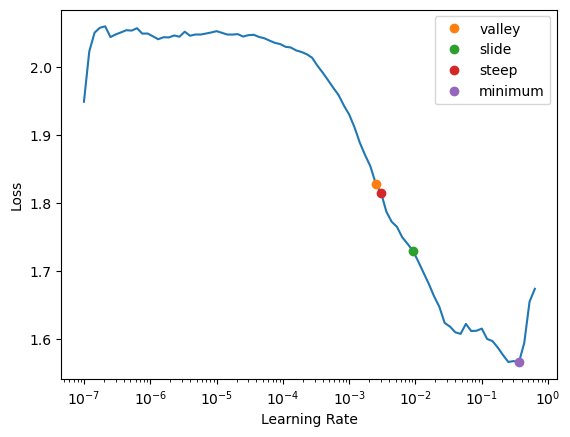

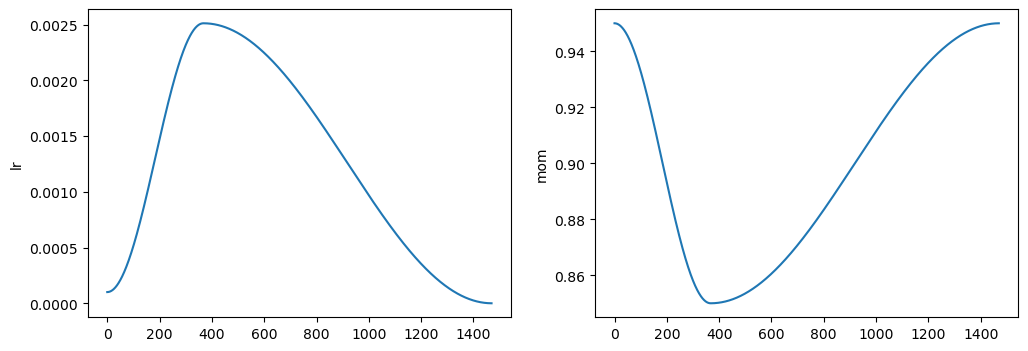

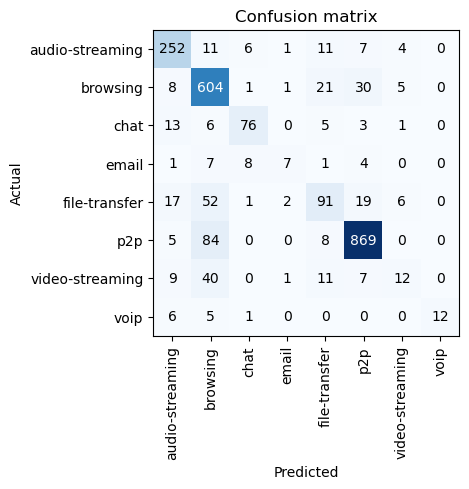

In [39]:

results_sparse_cnn = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 2
            }
        ],
    }
)

In [41]:
sp_model = results_sparse_cnn.model.model.model

print(f"Sparse CNN 3 filters normed has {sum(p.numel() for p in sp_model.parameters())} parameters")


Sparse CNN 3 filters normed has 28186 parameters


Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 12, 64])
post-flatten - torch.Size([64, 768])
Post-run: simple_model - torch.Size([64, 8])


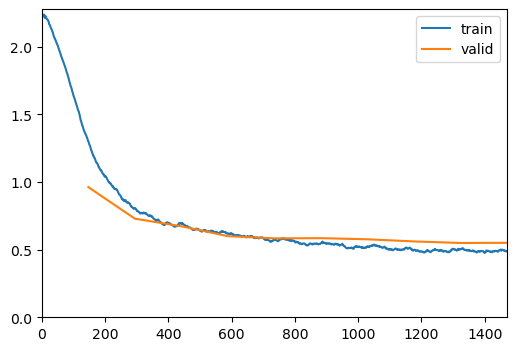

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5504308342933655, accuracy:  81.29%


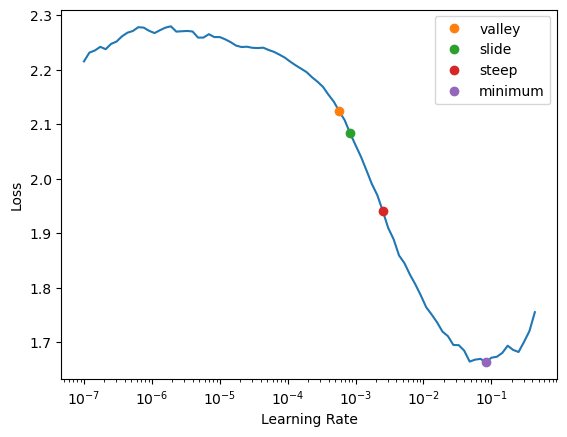

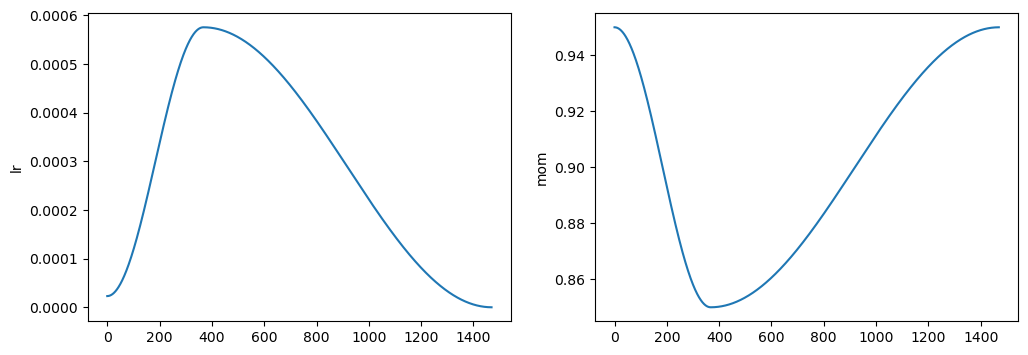

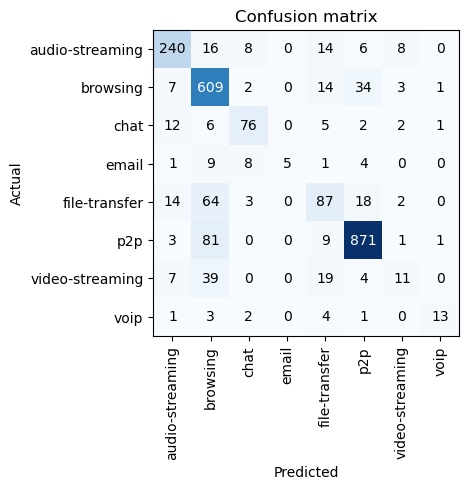

In [60]:

results_sparse_cnn_7 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 4
            }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 2, 64])
post-flatten - torch.Size([64, 128])
Post-run: simple_model - torch.Size([64, 8])


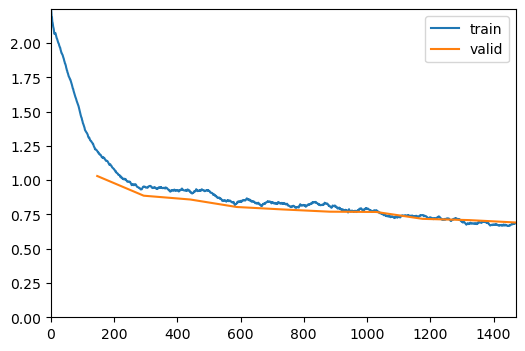

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

loss: 0.6915770173072815, accuracy:  77.08%


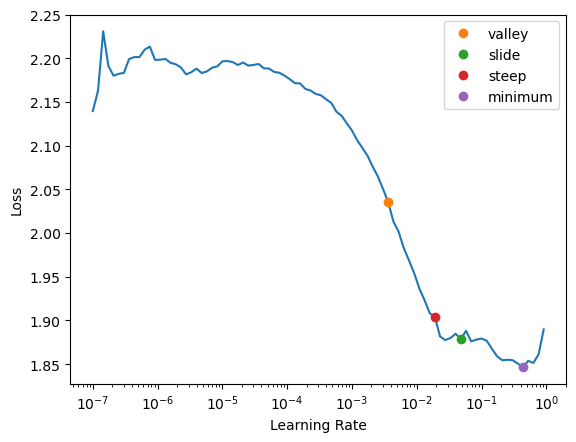

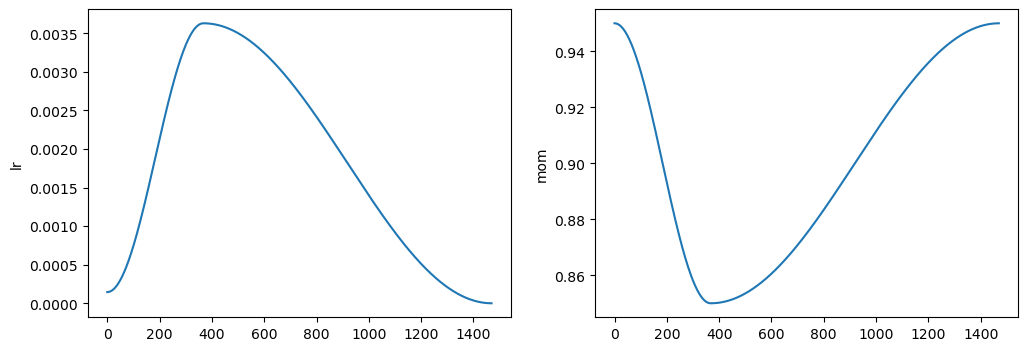

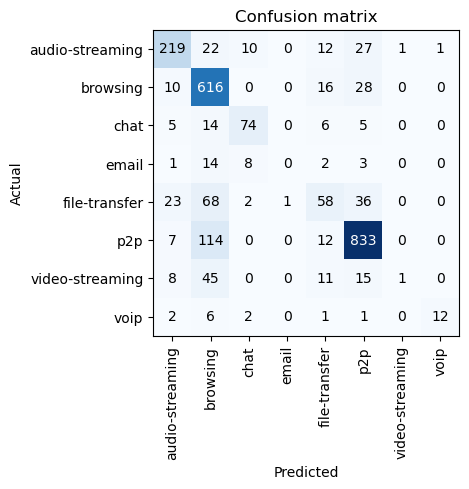

In [42]:

results_sparse_cnn_3 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed, 
    config = {
        'conv_layers': [
            {
                'filters': 2,
                'filter_width': 2
            }, {
                'filters': 1,
                'filter_width': 2
            }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 2, 64])
post-flatten - torch.Size([64, 128])
Post-run: simple_model - torch.Size([64, 8])


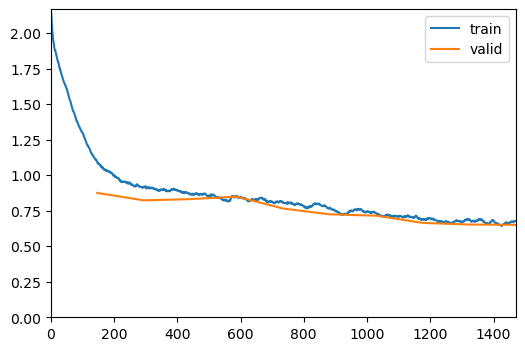

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

loss: 0.6502875685691833, accuracy:  78.44%


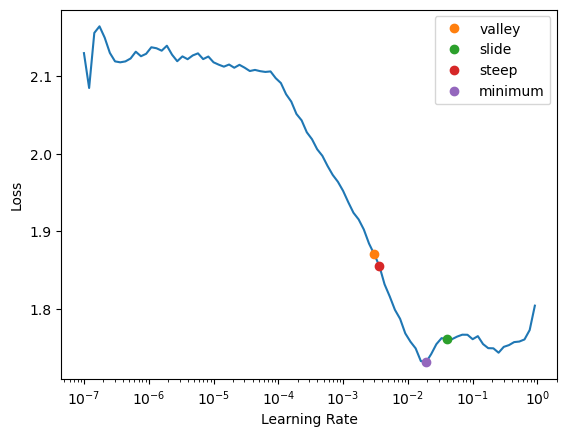

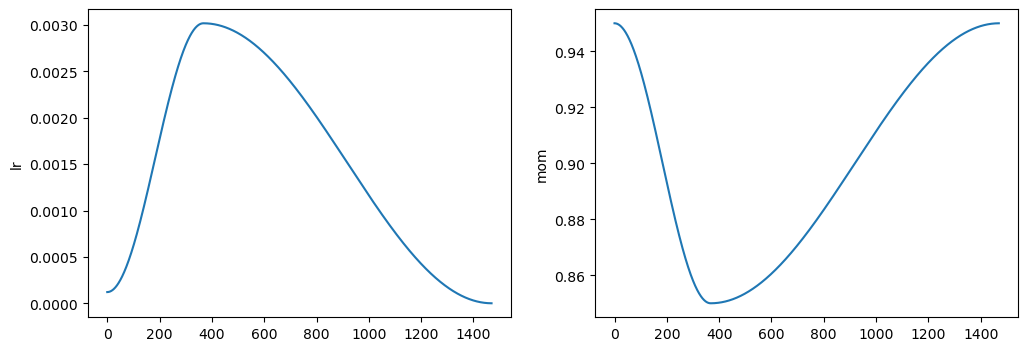

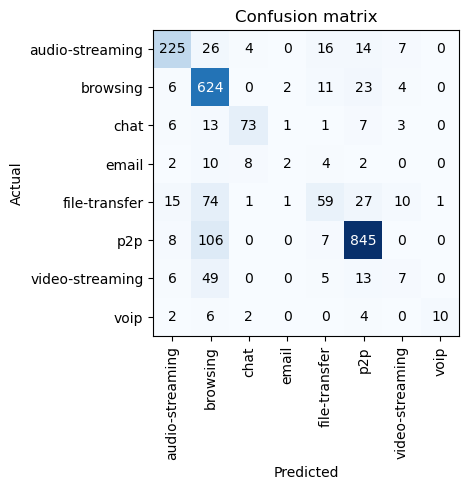

In [43]:
results_sparse_cnn_4 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed, 
    config = {
        'conv_layers': [
            {
                'filters': 4,
                'filter_width': 3
            }, {
                'filters': 2,
                'filter_width': 1
            }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 2, 64])
post-flatten - torch.Size([64, 128])
Post-run: simple_model - torch.Size([64, 8])


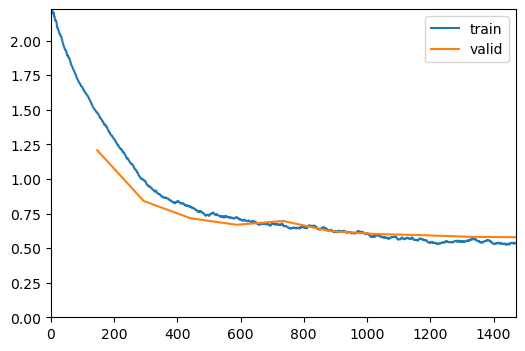

loss: 0.5788384675979614, accuracy:  81.46%


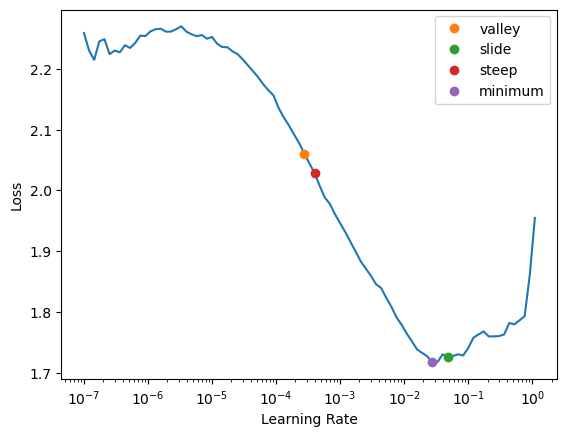

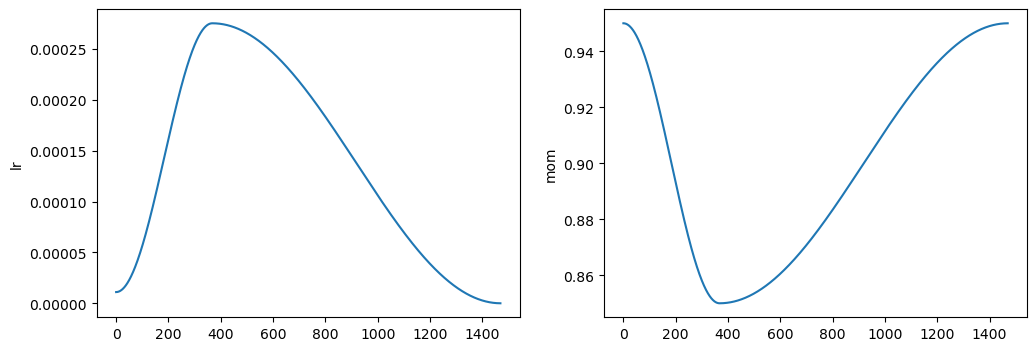

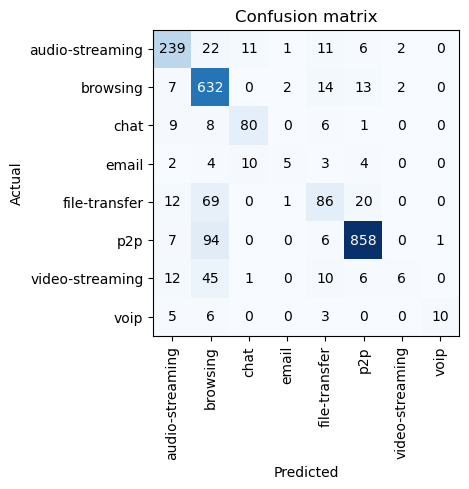

In [44]:
results_sparse_cnn_5 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed, 
    config = {
        'conv_layers': [
            {
                'filters': 4,
                'filter_width': 8
            }, {
                'filters': 2,
                'filter_width': 1
            }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 2, 64])
post-flatten - torch.Size([64, 128])
Post-run: simple_model - torch.Size([64, 8])


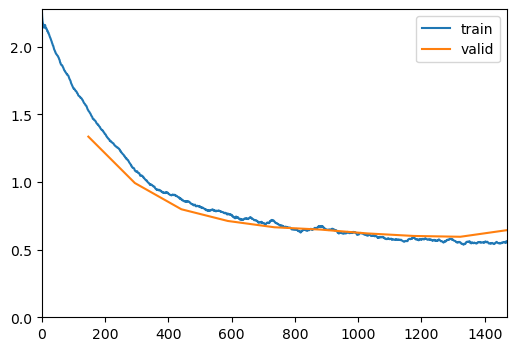

loss: 0.6437833905220032, accuracy:  79.97%


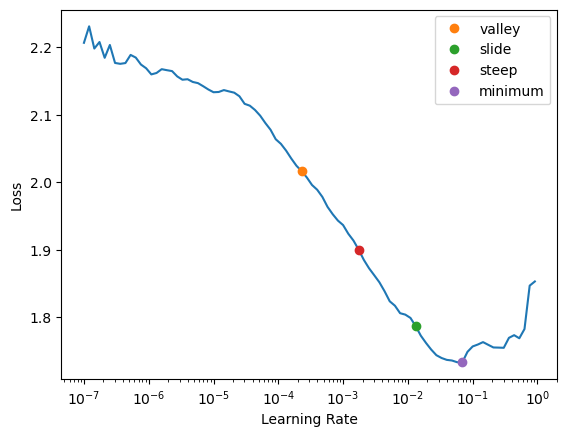

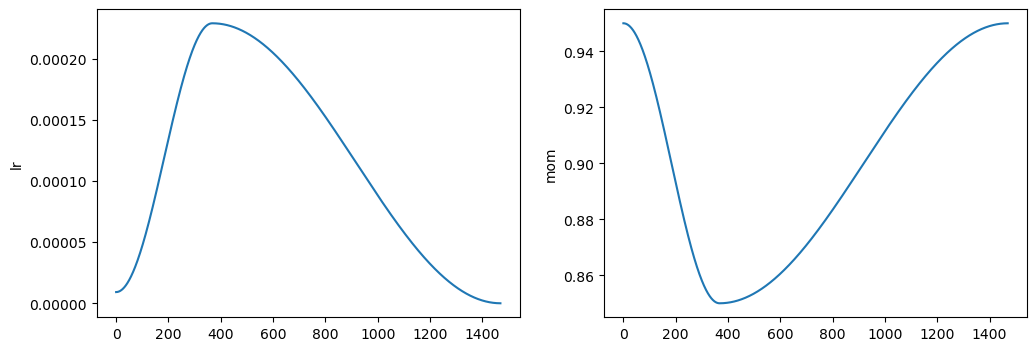

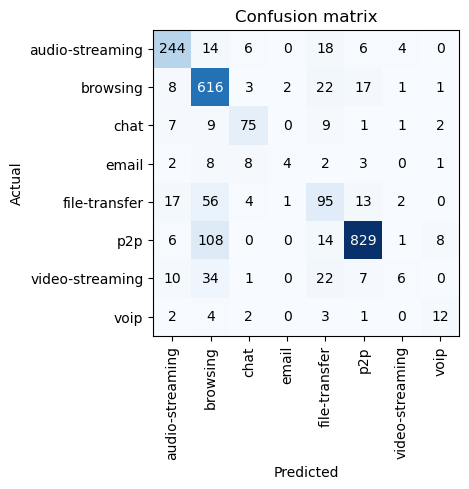

In [46]:
results_sparse_cnn_6 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed, 
    config = {
        'conv_layers': [
            {
                'filters': 4,
                'filter_width': 16
            }, {
                'filters': 2,
                'filter_width': 1
            }
        ],
    }
)

In [ ]:

results_sparse_cnn_4 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 2
            },
            {
                'filters': 1,
                'filter_width': 2
            },
        ],
    }
)

In [54]:
class GhostNorm(nn.Module):
    def __init__(self, num_groups, eps=1e-05, affine=True):
        super().__init__()
        self.num_groups = num_groups
        self.eps = eps
        self.affine = affine
        self.batch_size = None
        self.running_mean = None
        self.running_var = None

        if self.affine:
            self.weight = nn.Parameter(torch.ones(1)) - eps/2
            self.bias = nn.Parameter(torch.zeros(1)) + eps/2

    def forward(self, X):
        B, C, F = X.shape

        if self.batch_size is None:
            self.batch_size = B

        padded = False

        if X.shape[0] % self.num_groups != 0:
            # we just perform batch norm

            mean = X.mean([0, 2], keepdim=True)
            var = X.var([0, 2], unbiased=False, keepdim=True)

            X = (X - mean) / (torch.sqrt(var + self.eps))

        else:
            # Split the mini-batch dimension into groups of smaller batches
            X = X.reshape(self.num_groups, -1, C, F)

            # Calculate statistics over dim(0) x dim(2) number of slices of dim(1) x dim(3) dimension each
            mean = X.mean([1, 3], keepdim=True)
            var = X.var([1, 3], unbiased=False, keepdim=True)

            # Normalize X
            X = (X - mean) / (torch.sqrt(var + self.eps))

            # Reshape into the initial tensor shape
            X = X.reshape(self.batch_size, C, F)
            
        return self.weight * X + self.bias
        
        
    def extra_repr(self):
        return '{num_features}, num_groups={num_groups}, eps={eps}'.format(**self.__dict__)

Shape of Input Data: (11762, 63)
Parameters in the model: 35966


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 2, 32])
post-flatten - torch.Size([64, 64])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


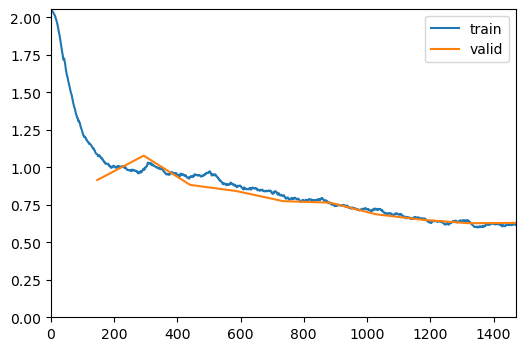

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

loss: 0.6295741200447083, accuracy:  79.00%


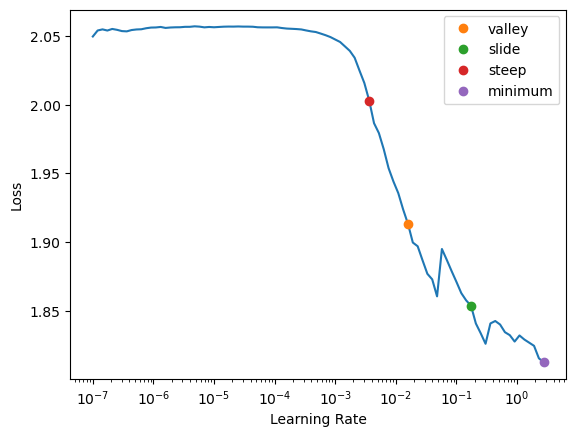

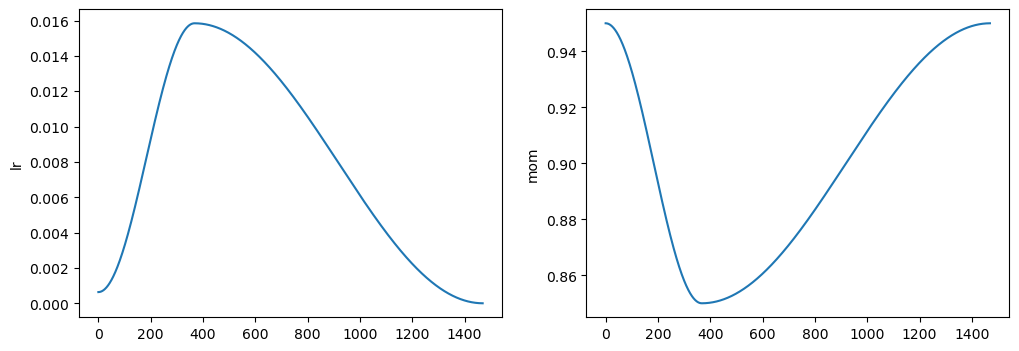

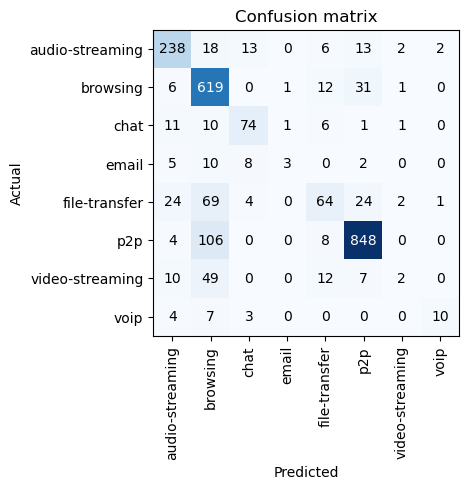

In [60]:
# nn.AdaptiveMaxPool1d

class SparseCNN_Normed_Pooled(nn.Module):
    def __init__(self, input_features = 62, output_features = 8, device = 'cpu', config: dict = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 5,
                'pool_size': 32
            },
        ],

        'fc_layers': [
            100 for _ in range(3)
        ]
    }):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features

        conv_layers = []
        pool_layers = []

        last_output_features = input_features

        for i, layer in enumerate(config['conv_layers']):
            channels = 1 if i == 0 else conv_layers[i-1].num_filters * conv_layers[i-1].filter_width

            features = last_output_features            

            conv_layers.append(
                SparseConv(
                    features=input_features, 
                    channels=channels,
                    filters=layer['filters'], 
                    filter_width=layer['filter_width']
                )
            )

            if 'pool_size' in layer:
                pool_layers.append(
                    nn.AdaptiveMaxPool1d(layer['pool_size'])
                )

                last_output_features = layer['pool_size']

            else:
                pool_layers.append(None)

        layers = []

        for i, layer in enumerate(conv_layers):
            # channels = 1 if i == 0 else layers[i-1].num_filters * layers[i-1].filter_width
            channels = layer.num_filters * layer.filter_width
            layers.append(layer)
            # layers.append(nn.ReLU())
            layers.append(
                # nn.GroupNorm(channels, channels)
                nn.BatchNorm1d(channels)
            )

            if pool_layers[i] is not None:
                layers.append(pool_layers[i])

            # layers.append(
            #     nn.AdaptiveMaxPool1d()
            # )

        head_input_size = conv_layers[-1].num_filters * conv_layers[-1].filter_width * last_output_features

        fc_layers = []
        if 'fc_layers' in config and len(config['fc_layers']) > 0:
            for i, layer in enumerate(config['fc_layers']):
                size = head_input_size if i == 0 else config['fc_layers'][i-1]

                fc_layers.extend([
                    nn.Linear(size, layer),
                    nn.ReLU()
                ])

            fc_layers.append(
                nn.Linear(config['fc_layers'][-1], output_features)
            )
        
        else:
            fc_layers.append(
                nn.Linear(head_input_size, output_features)
            )

        self.head = nn.Sequential(
            *layers,
            Debug_Module('pre-flatten'),
            nn.Flatten(),
            Debug_Module('post-flatten'),
            *fc_layers
            # nn.Linear(conv_layers[-1].num_filters * conv_layers[-1].filter_width * last_output_features, output_features)
        )

        self.flag: bool = True


    def forward(self, x):
        if self.flag:
            print('Pre-run: simple_model -', x.shape)

        x = x.reshape(x.shape[0], 1, -1)
        if self.flag:
            print("reshaped: simple_model -", x.shape)

        x = self.head(x)

        if self.flag:
            print('Post-run: simple_model -', x.shape)
            self.flag = False

        # raise Exception('stop')
        return x


results_sparse_cnn_np_1 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 2,
                'pool_size': 32
            },
        ],
        'fc_layers': [
            100 for _ in range(3)
        ]
    },
)


Shape of Input Data: (11762, 63)
Parameters in the model: 35962


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 2, 32])
post-flatten - torch.Size([64, 64])
Post-run: simple_model - torch.Size([64, 8])


torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


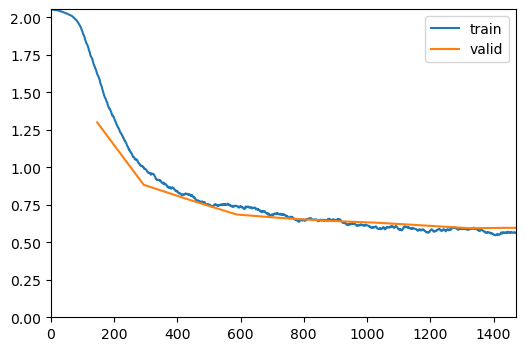

torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


torch.Size([48, 2, 64])
torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


torch.Size([48, 2, 64])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5969158411026001, accuracy:  80.48%


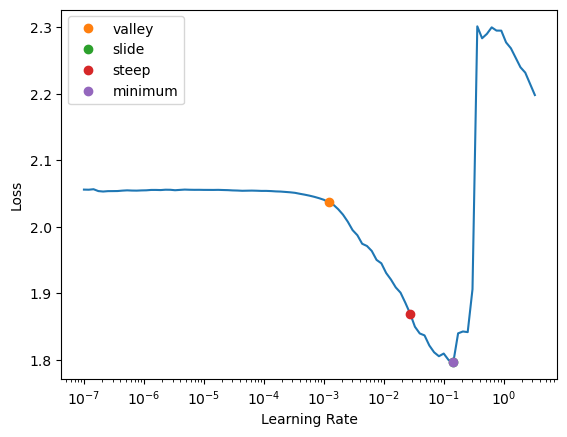

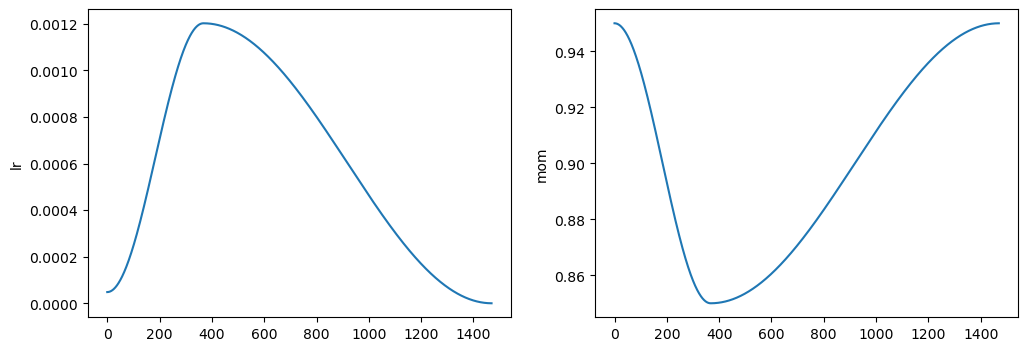

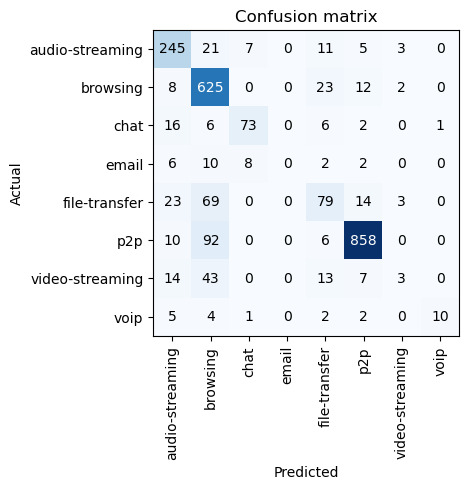

In [58]:
class SparseCNN_GNormed_Pooled(nn.Module):
    def __init__(self, input_features = 62, output_features = 8, device = 'cpu', config: dict = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 5,
                'pool_size': 32,
                'virtual_batch_size': 64
            },
        ],

        'fc_layers': [
            100 for _ in range(3)
        ]
    }):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features

        conv_layers = []
        norm_layers = []
        pool_layers = []

        last_output_features = input_features

        for i, layer in enumerate(config['conv_layers']):
            channels = 1 if i == 0 else conv_layers[i-1].num_filters * conv_layers[i-1].filter_width

            features = last_output_features            

            conv_layers.append(
                SparseConv(
                    features=input_features, 
                    channels=channels,
                    filters=layer['filters'], 
                    filter_width=layer['filter_width']
                )
            )

            if 'virtual_batch_size' in layer:
                norm_layers.append(
                    GhostNorm(layer['virtual_batch_size'])
                )
            else:
                norm_layers.append(
                    nn.BatchNorm1d(
                        layer['filters'] * layer['filter_width']
                    )
                )

            if 'pool_size' in layer:
                pool_layers.append(
                    nn.AdaptiveMaxPool1d(layer['pool_size'])
                )

                last_output_features = layer['pool_size']

            else:
                pool_layers.append(None)

        layers = []

        for i, layer in enumerate(conv_layers):
            channels = layer.num_filters * layer.filter_width
            layers.append(layer)
            # layers.append(nn.ReLU())
            # layers.append(
            #     # nn.GroupNorm(channels, channels)
            #     # nn.BatchNorm1d(channels)
            #     GhostNorm(virtual_batch_size)
            # )

            layers.append(
                norm_layers[i]
            )

            if pool_layers[i] is not None:
                layers.append(pool_layers[i])


        head_input_size = conv_layers[-1].num_filters * conv_layers[-1].filter_width * last_output_features

        fc_layers = []
        if 'fc_layers' in config and len(config['fc_layers']) > 0:
            for i, layer in enumerate(config['fc_layers']):
                size = head_input_size if i == 0 else config['fc_layers'][i-1]

                fc_layers.extend([
                    nn.Linear(size, layer),
                    nn.ReLU()
                ])

            fc_layers.append(
                nn.Linear(config['fc_layers'][-1], output_features)
            )
        
        else:
            fc_layers.append(
                nn.Linear(head_input_size, output_features)
            )

        self.head = nn.Sequential(
            *layers,
            Debug_Module('pre-flatten'),
            nn.Flatten(),
            Debug_Module('post-flatten'),
            *fc_layers
            # nn.Linear(conv_layers[-1].num_filters * conv_layers[-1].filter_width * last_output_features, output_features)
        )

        self.flag: bool = True


    def forward(self, x):
        if self.flag:
            print('Pre-run: simple_model -', x.shape)

        x = x.reshape(x.shape[0], 1, -1)
        if self.flag:
            print("reshaped: simple_model -", x.shape)

        x = self.head(x)

        if self.flag:
            print('Post-run: simple_model -', x.shape)
            self.flag = False

        # raise Exception('stop')
        return x


results_sparse_cnn_np_1 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_GNormed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 2,
                'pool_size': 32,
                'virtual_batch_size': 16
            },
        ],
        'fc_layers': [
            100 for _ in range(3)
        ]
    },
    batch_size=64
)


In [ ]:

results_sparse_cnn_np_1 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_GNormed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 2,
                'pool_size': 32,
                'virtual_batch_size': 32
            },
        ],
        'fc_layers': [
            100 for _ in range(3)
        ]
    },
    batch_size=128
)

Shape of Input Data: (11762, 63)
Parameters in the model: 49030


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 6, 32])
post-flatten - torch.Size([64, 192])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


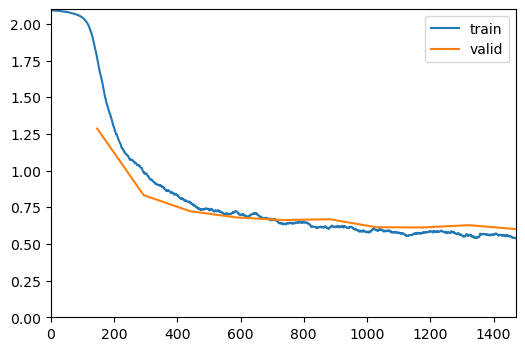

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.6010897159576416, accuracy:  80.19%


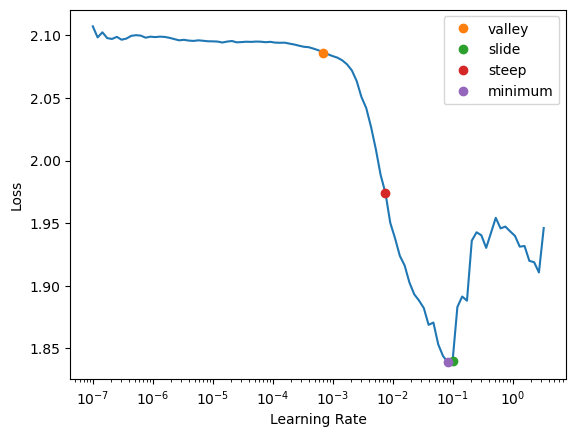

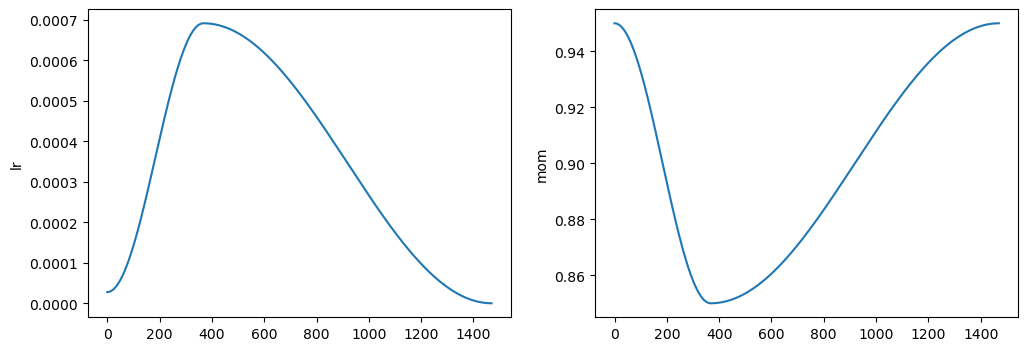

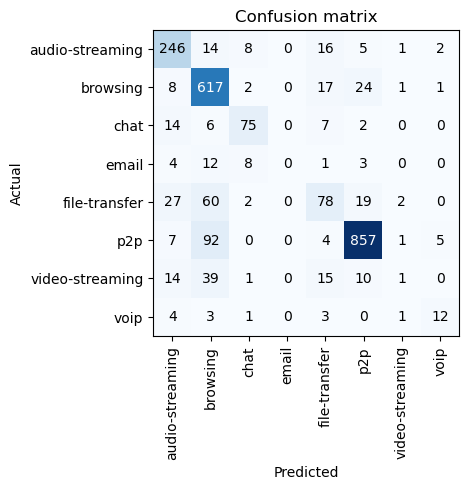

In [61]:

results_sparse_cnn_np_2 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 6,
                'pool_size': 32
            },
        ],
        'fc_layers': [
            100 for _ in range(3)
        ]
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 12, 32])
post-flatten - torch.Size([64, 384])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


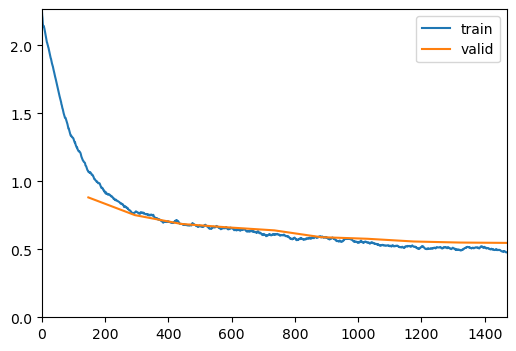

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5472124218940735, accuracy:  81.85%


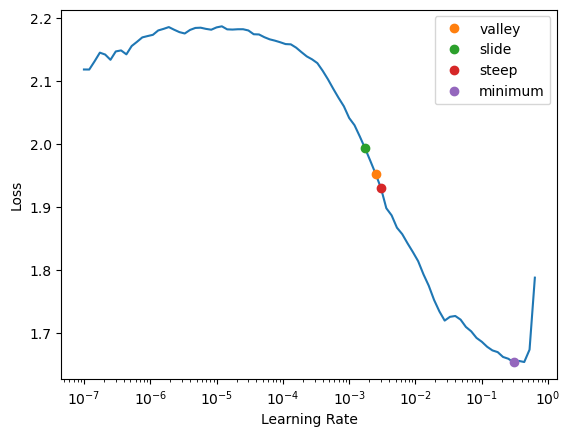

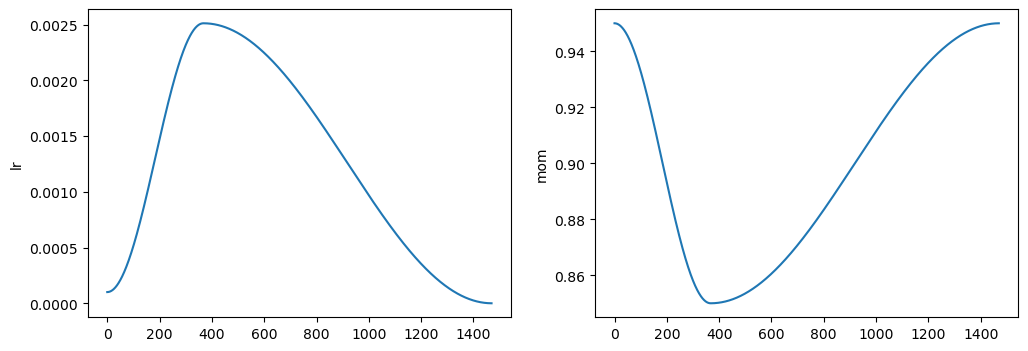

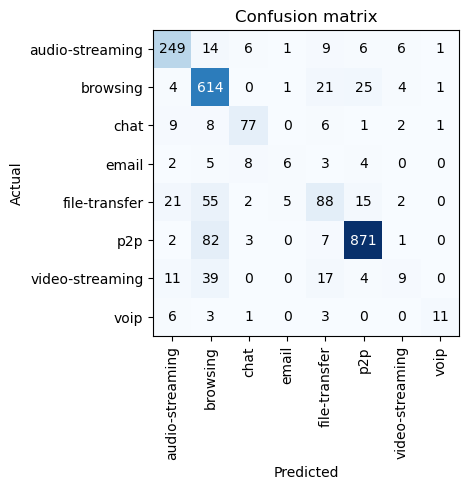

In [53]:

results_sparse_cnn_np_3 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 12,
                'pool_size': 32
            },
        ],
        'fc_layers': [
            100 for _ in range(3)
        ]
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 6, 32])
post-flatten - torch.Size([64, 192])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


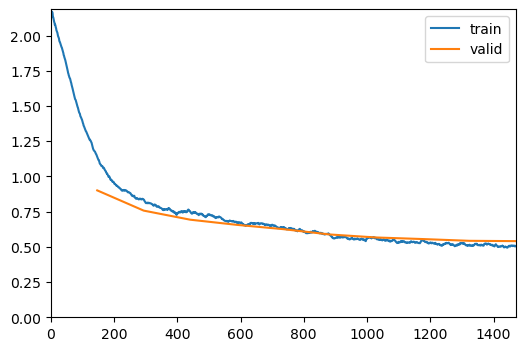

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5405957698822021, accuracy:  81.72%


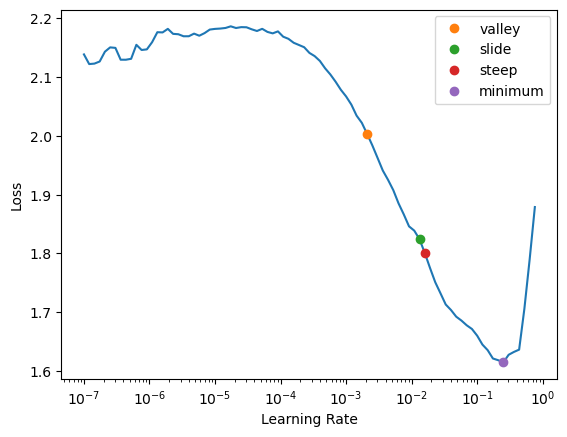

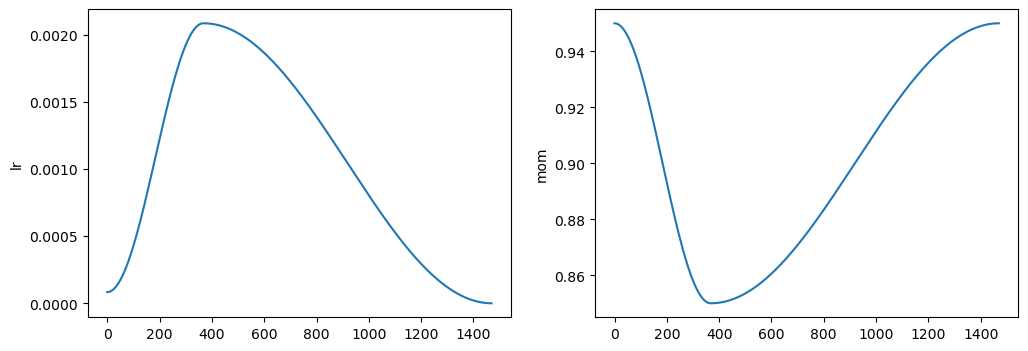

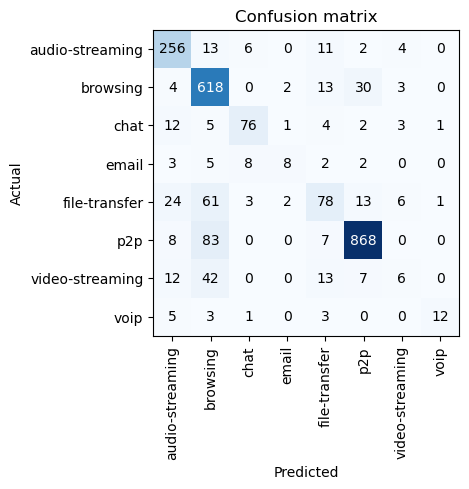

In [54]:

results_sparse_cnn_np_4 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 2,
                'pool_size': 32
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 12, 32])
post-flatten - torch.Size([64, 384])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


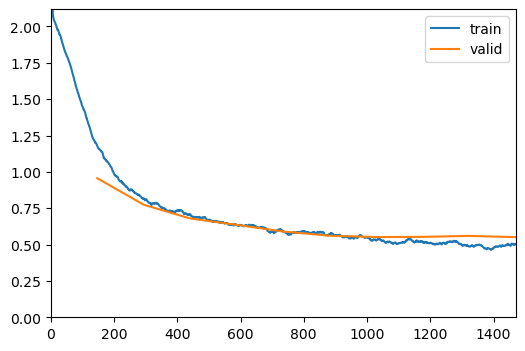

loss: 0.5510851144790649, accuracy:  81.76%


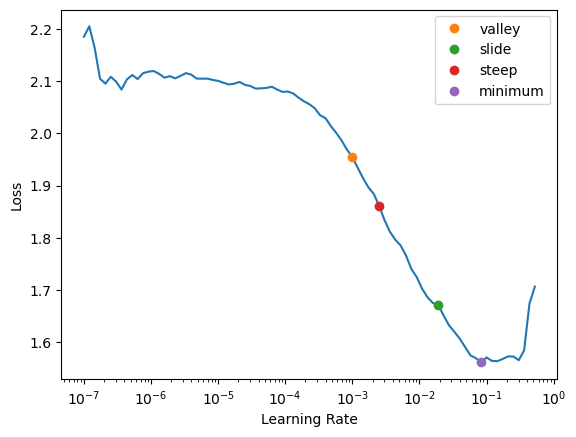

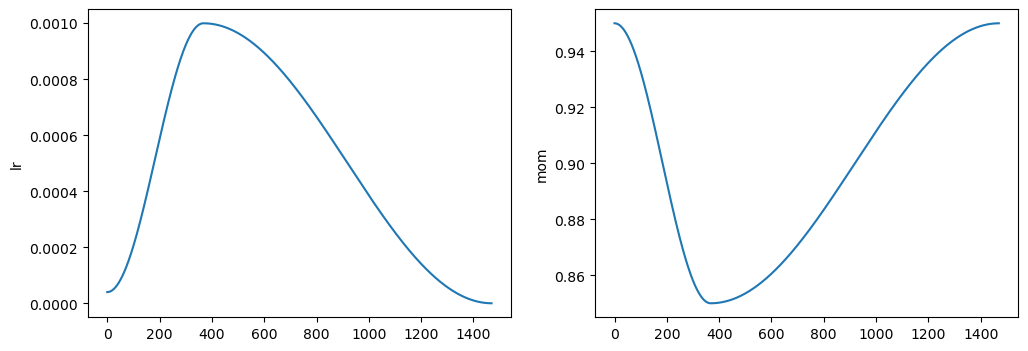

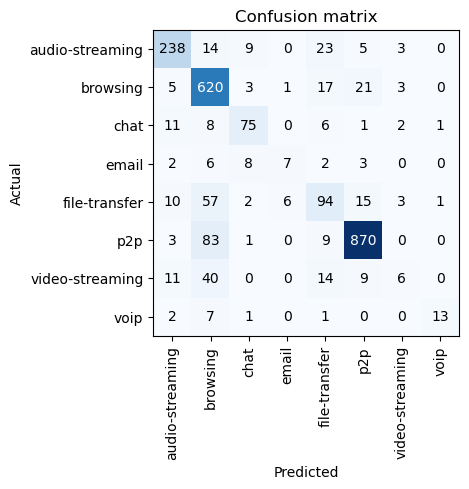

In [55]:

results_sparse_cnn_np_5 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 4,
                'pool_size': 32
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 24, 16])
post-flatten - torch.Size([64, 384])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


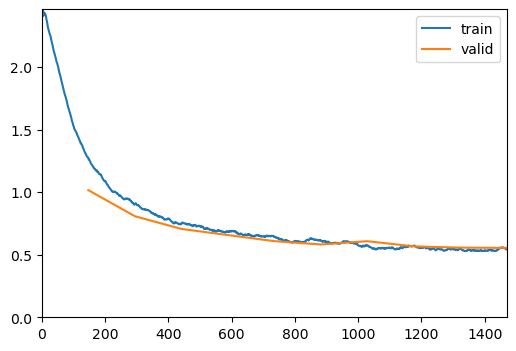

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5541877746582031, accuracy:  81.59%


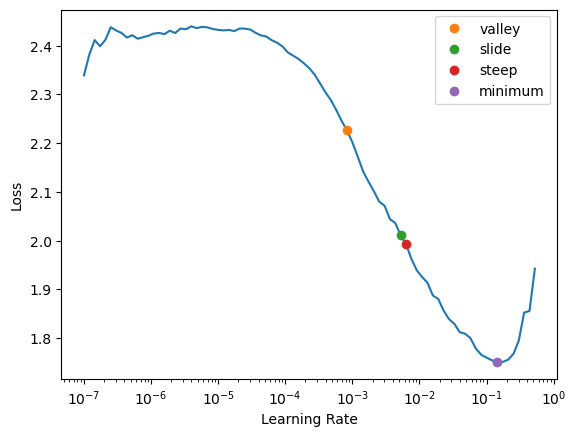

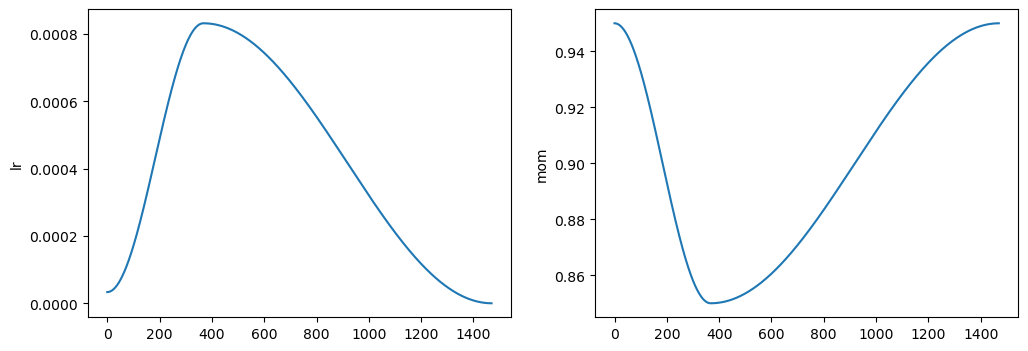

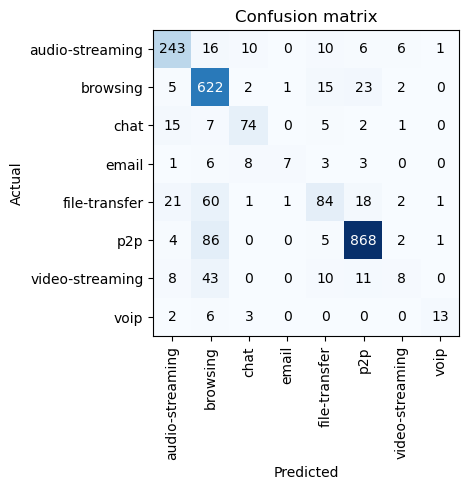

In [56]:
results_sparse_cnn_np_6 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 8,
                'pool_size': 16
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 24, 32])
post-flatten - torch.Size([64, 768])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


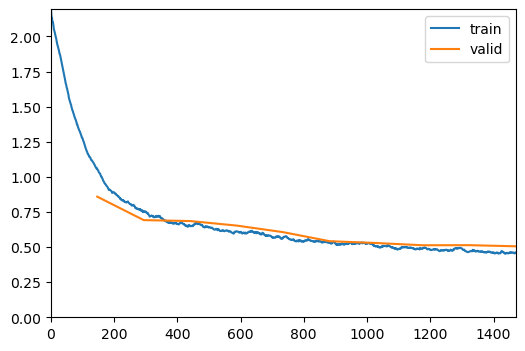

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5054762959480286, accuracy:  83.21%


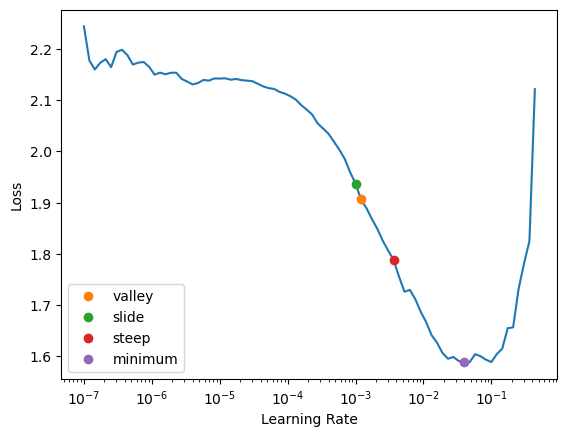

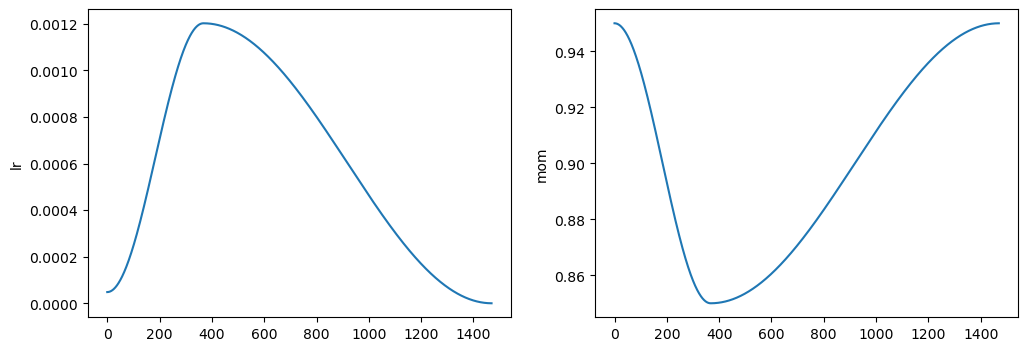

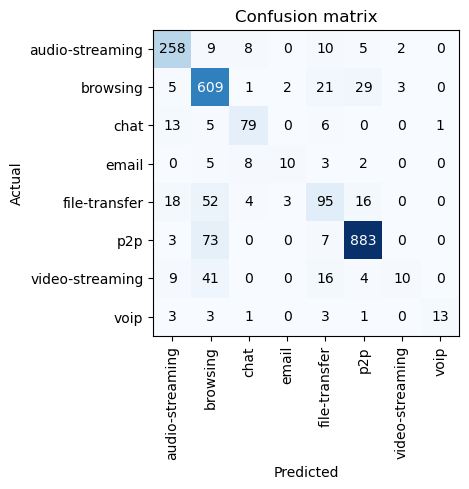

In [58]:

results_sparse_cnn_np_7 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 8,
                'pool_size': 32
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 24, 32])
post-flatten - torch.Size([64, 768])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


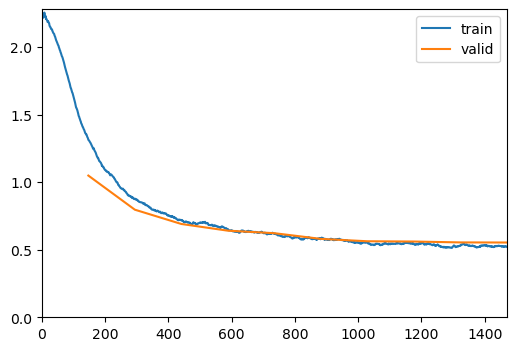

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5535508990287781, accuracy:  81.16%


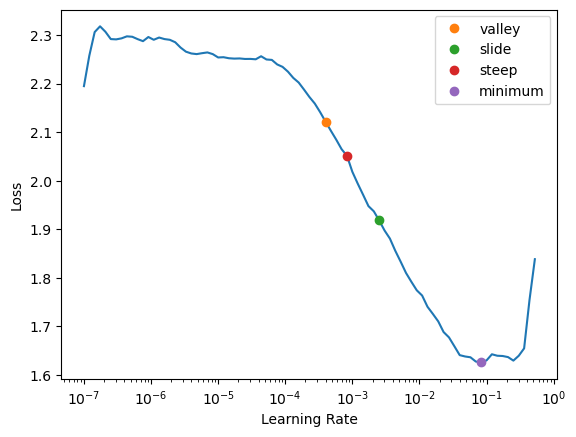

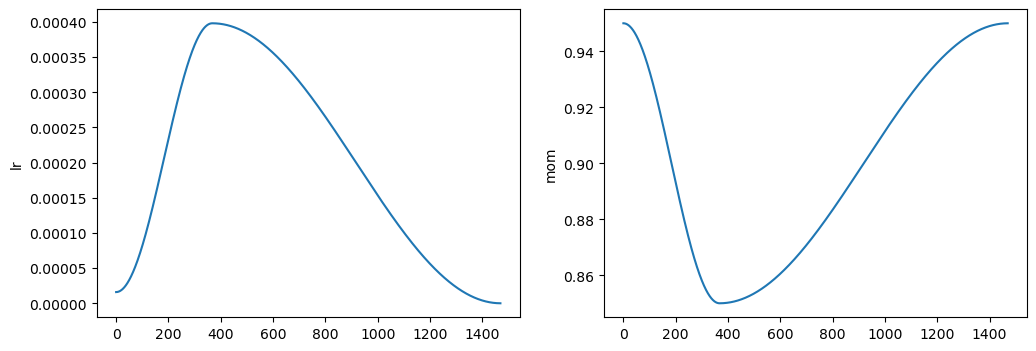

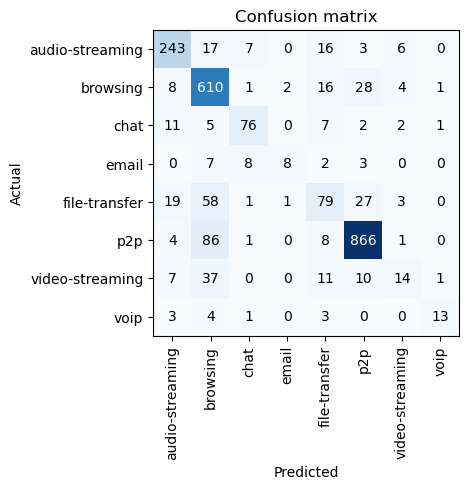

In [25]:
results_sparse_cnn_np_7 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 8,
                'pool_size': 32
            },
        ],
    }
)

In [59]:
print(f"{sum(p.numel() for p in results_sparse_cnn_np_3.model.model.model.parameters())} parameters")


32446 parameters


Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 30, 32])
post-flatten - torch.Size([64, 960])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


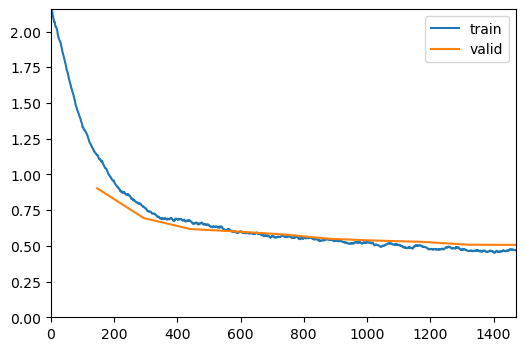

loss: 0.506708025932312, accuracy:  82.74%


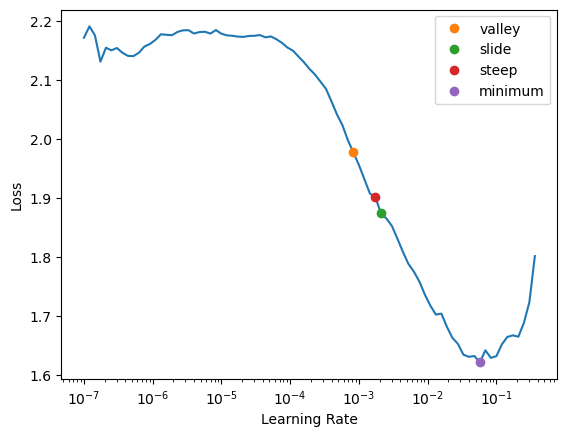

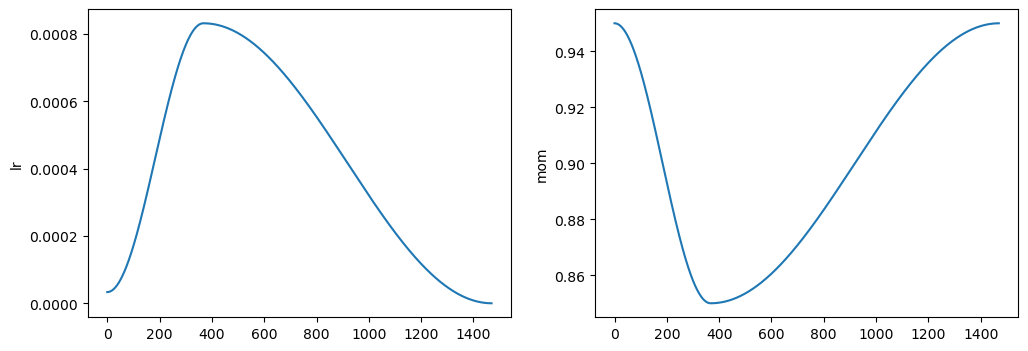

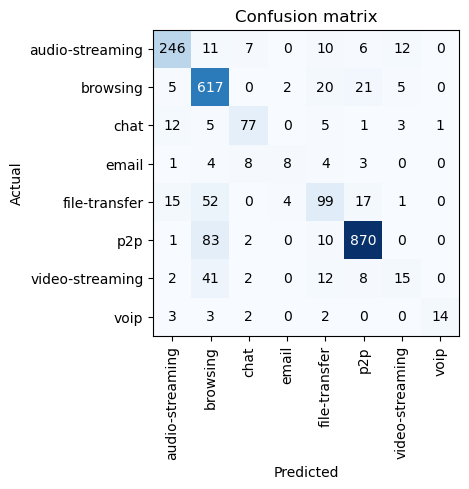

In [61]:
results_sparse_cnn_np_8 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 10,
                'pool_size': 32
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 48, 16])
post-flatten - torch.Size([64, 768])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


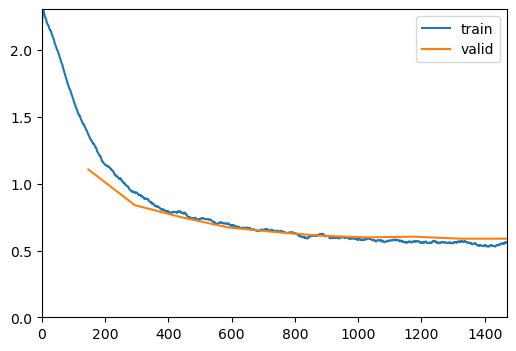

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5887577533721924, accuracy:  80.02%


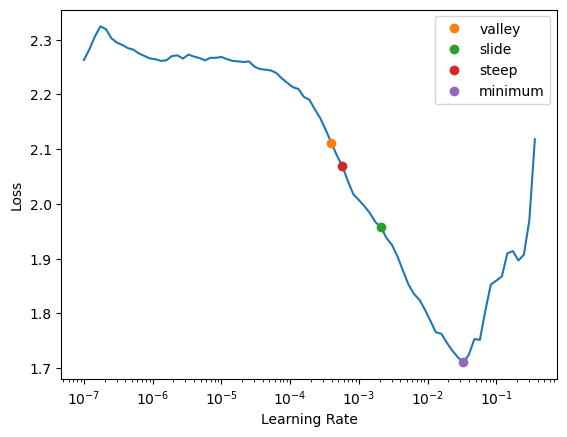

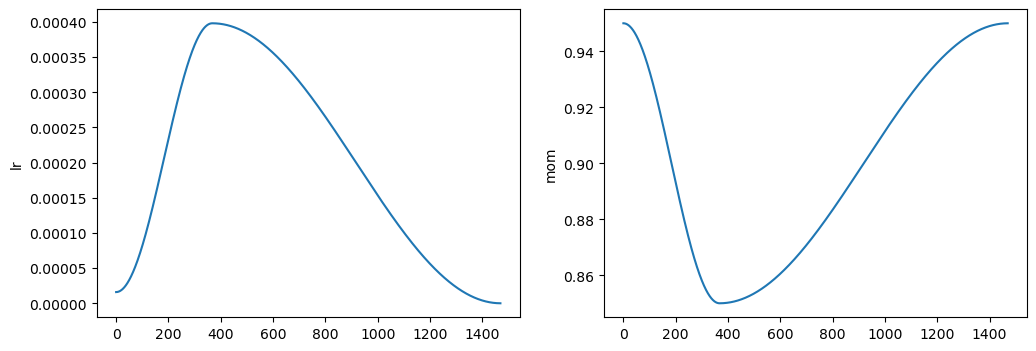

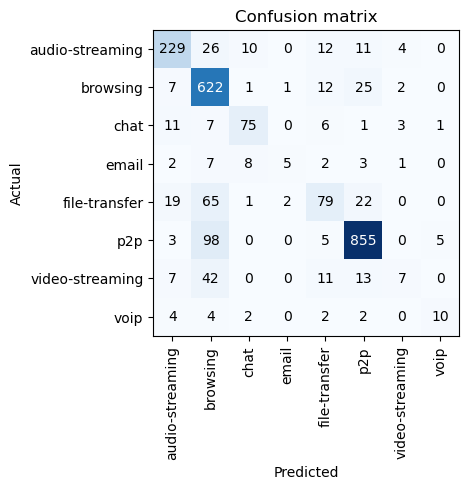

In [57]:

results_sparse_cnn_np_9 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 16,
                'pool_size': 16
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 2, 32])
post-flatten - torch.Size([64, 64])
Post-run: simple_model - torch.Size([64, 8])


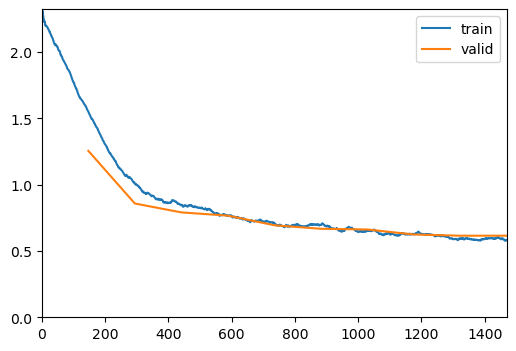

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.615105152130127, accuracy:  79.89%


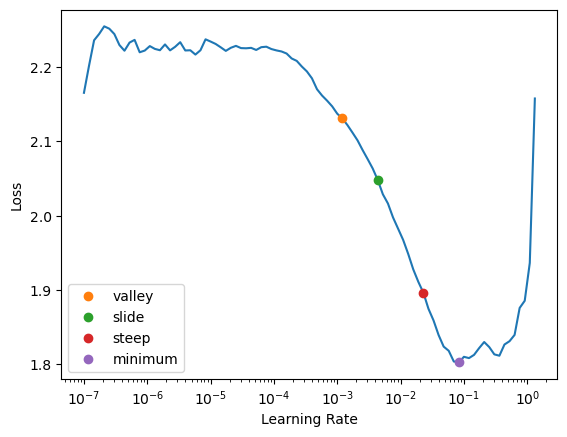

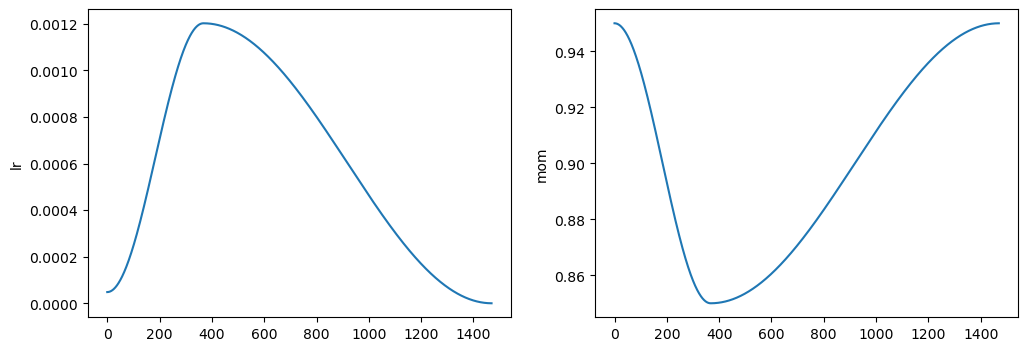

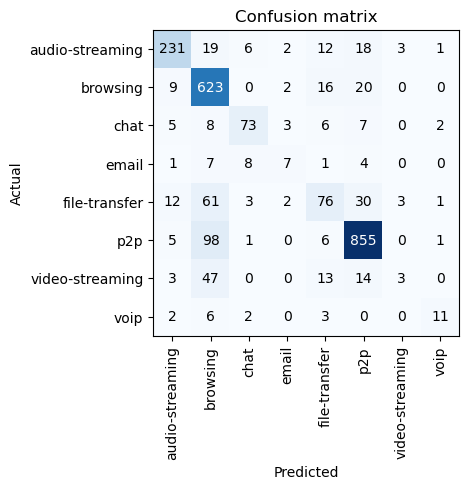

In [63]:

class SparseCNN_Normed_Pooled(nn.Module):
    def __init__(self, input_features = 62, output_features = 8, device = 'cpu', config: dict = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 5,
                'pool_size': 32
            },
        ],

        # 'fc_layers': [
        #     50 for _ in range(3)
        # ]
    }):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features

        conv_layers = []
        pool_layers = []

        last_output_features = input_features

        for i, layer in enumerate(config['conv_layers']):
            channels = 1 if i == 0 else conv_layers[i-1].num_filters * conv_layers[i-1].filter_width

            features = last_output_features            

            conv_layers.append(
                SparseConv(
                    features=features, 
                    channels=channels,
                    filters=layer['filters'], 
                    filter_width=layer['filter_width']
                )
            )

            if 'pool_size' in layer:
                pool_layers.append(
                    nn.AdaptiveMaxPool1d(layer['pool_size'])
                )

                last_output_features = layer['pool_size']

            else:
                pool_layers.append(None)

        layers = []

        for i, layer in enumerate(conv_layers):
            # channels = 1 if i == 0 else layers[i-1].num_filters * layers[i-1].filter_width
            channels = layer.num_filters * layer.filter_width
            layers.append(layer)
            # layers.append(nn.ReLU())
            layers.append(
                nn.GroupNorm(channels, channels)
            )

            if pool_layers[i] is not None:
                layers.append(pool_layers[i])

            # layers.append(
            #     nn.AdaptiveMaxPool1d()
            # )


        self.layers = nn.Sequential(
            *layers,
            Debug_Module('pre-flatten'),
            nn.Flatten(),
            Debug_Module('post-flatten'),
            nn.Linear(conv_layers[-1].num_filters * conv_layers[-1].filter_width * last_output_features, output_features)
        )

        self.flag: bool = True


    def forward(self, x):
        if self.flag:
            print('Pre-run: simple_model -', x.shape)

        x = x.reshape(x.shape[0], 1, -1)
        if self.flag:
            print("reshaped: simple_model -", x.shape)

        x = self.layers(x)

        if self.flag:
            print('Post-run: simple_model -', x.shape)
            self.flag = False

        # raise Exception('stop')
        return x


results_sparse_cnn_np_5 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 2,
                'pool_size': 32
            },
            {
                'filters': 1,
                'filter_width': 2,
                # 'pool_size': 32
            }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 2, 32])
post-flatten - torch.Size([64, 64])
Post-run: simple_model - torch.Size([64, 8])


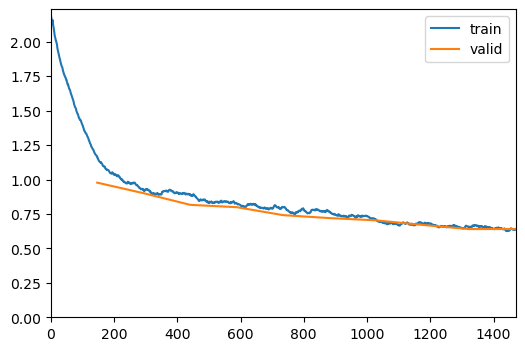

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.6408559679985046, accuracy:  79.93%


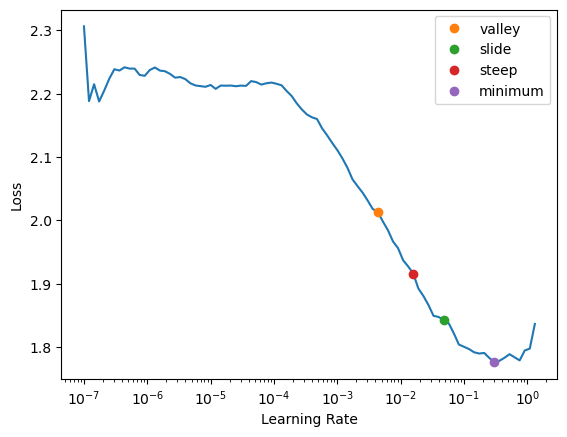

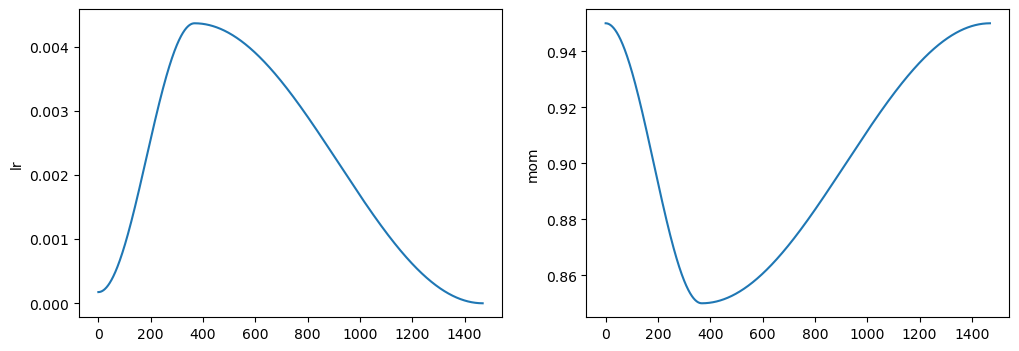

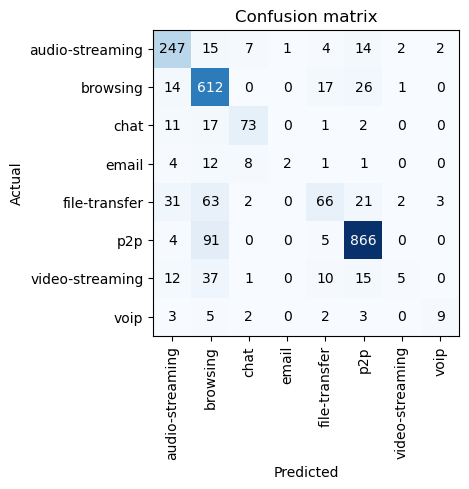

In [64]:

results_sparse_cnn_np_10 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 4,
                'pool_size': 32
            },
            {
                'filters': 1,
                'filter_width': 2,
                # 'pool_size': 32
            }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 2, 32])
post-flatten - torch.Size([64, 64])
Post-run: simple_model - torch.Size([64, 8])


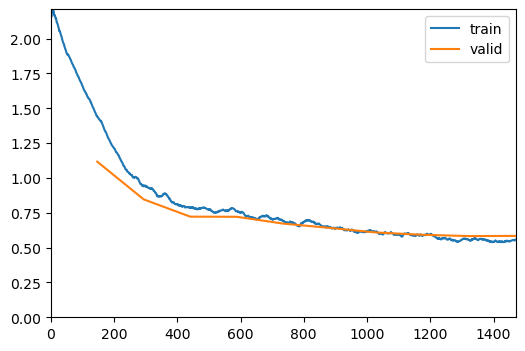

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.584113597869873, accuracy:  81.34%


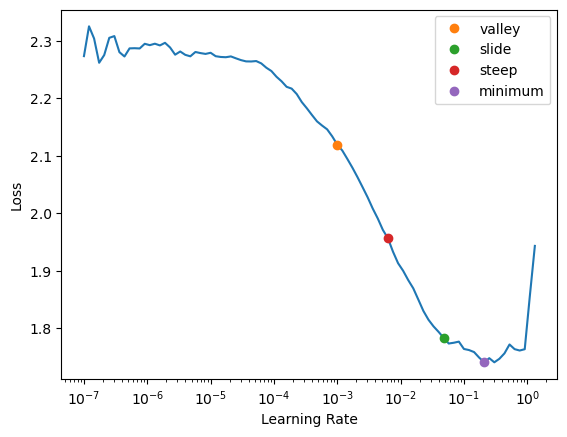

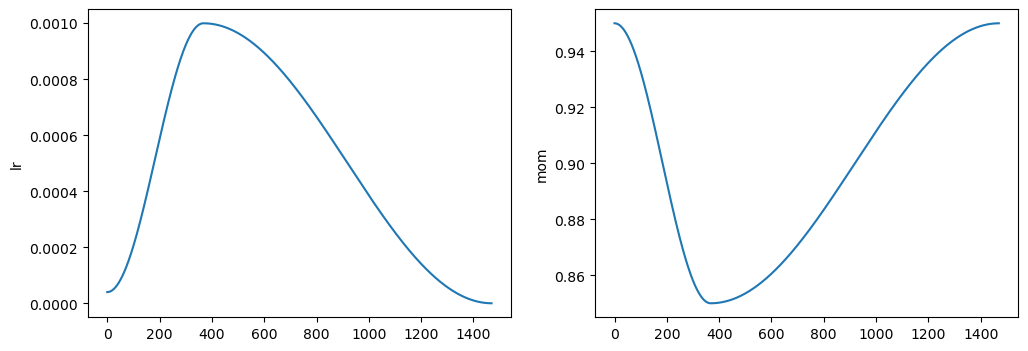

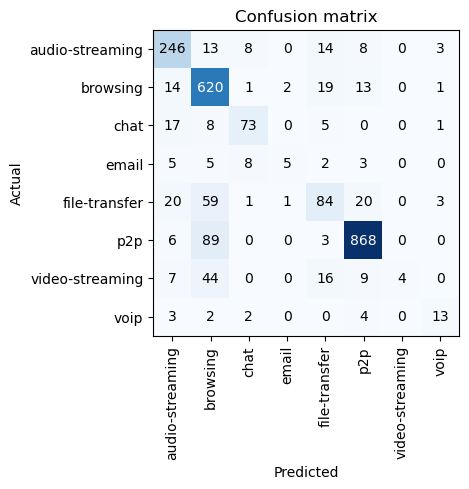

In [65]:

results_sparse_cnn_np_11 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 8,
                'pool_size': 32
            },
            {
                'filters': 1,
                'filter_width': 2,
                # 'pool_size': 32
            }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 4, 32])
post-flatten - torch.Size([64, 128])
Post-run: simple_model - torch.Size([64, 8])


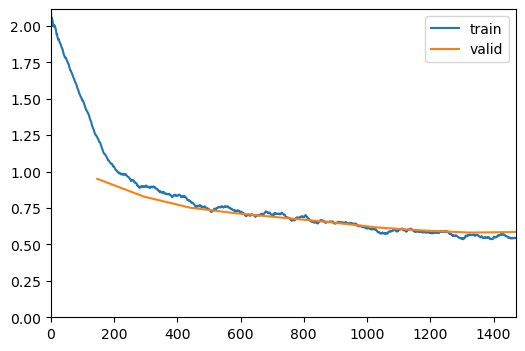

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5851449966430664, accuracy:  81.04%


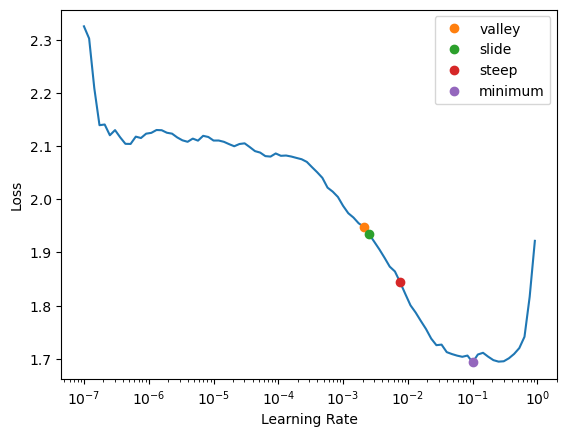

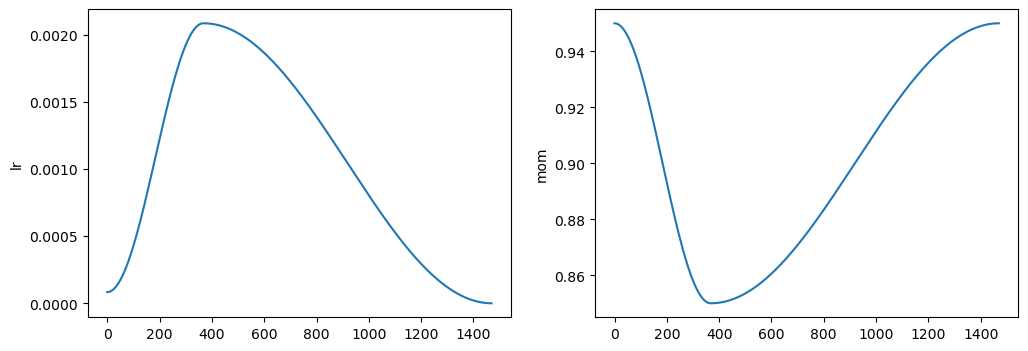

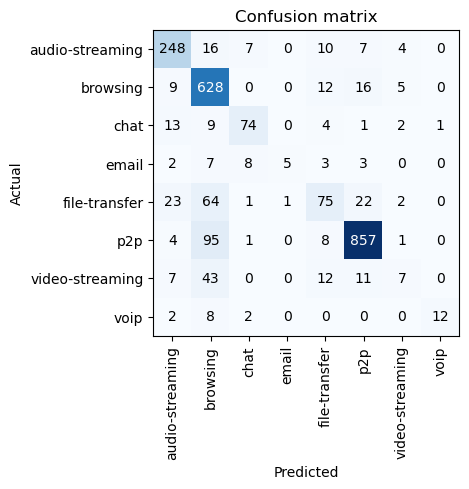

In [66]:

results_sparse_cnn_np_12 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 2,
                'pool_size': 32
            },
            {
                'filters': 1,
                'filter_width': 4,
                # 'pool_size': 32
            }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 4, 32])
post-flatten - torch.Size([64, 128])
Post-run: simple_model - torch.Size([64, 8])


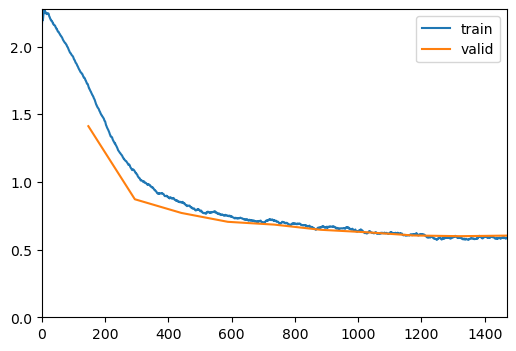

loss: 0.6033900380134583, accuracy:  80.14%


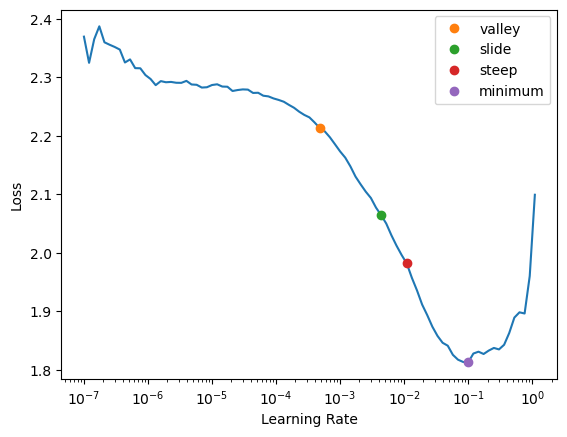

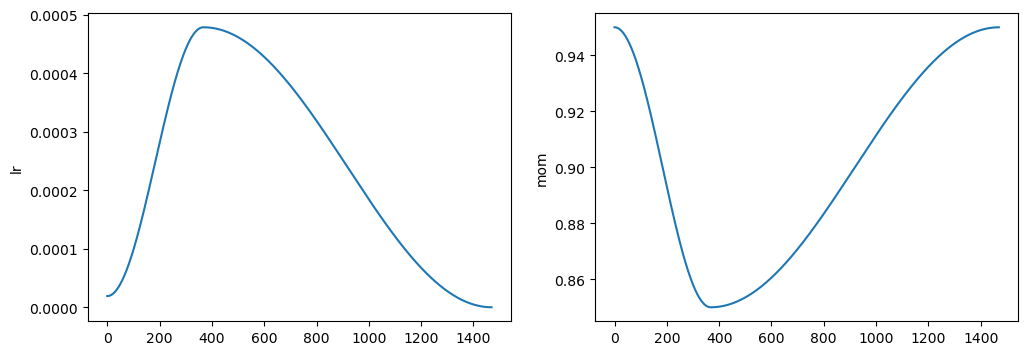

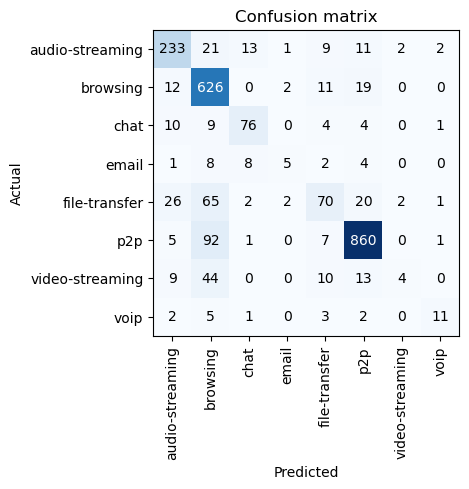

In [67]:

results_sparse_cnn_np_13 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 4,
                'pool_size': 32
            },
            {
                'filters': 1,
                'filter_width': 4,
                # 'pool_size': 32
            }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 4, 32])
post-flatten - torch.Size([64, 128])
Post-run: simple_model - torch.Size([64, 8])


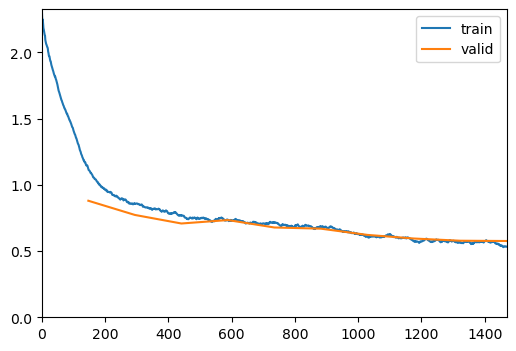

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5761898159980774, accuracy:  80.95%


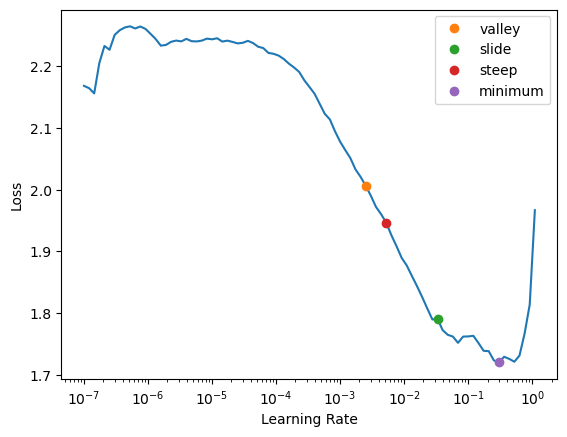

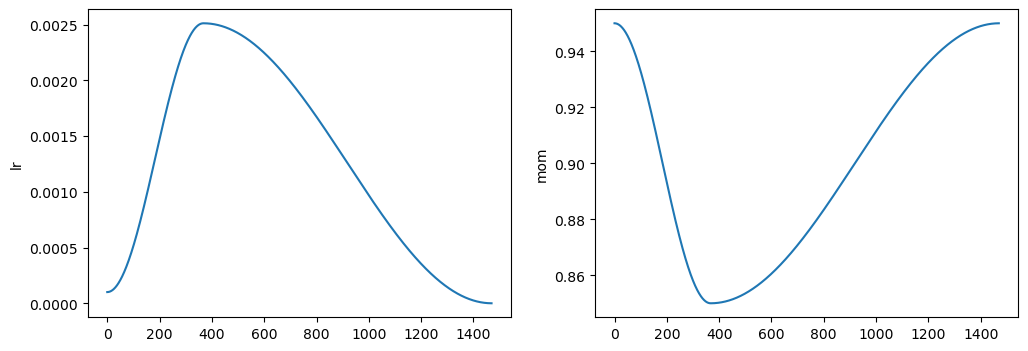

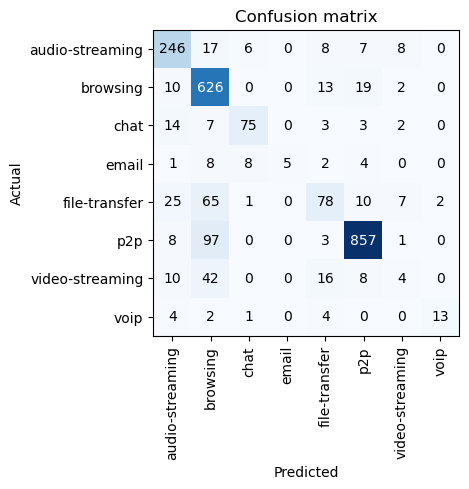

In [68]:

results_sparse_cnn_np_14 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 8,
                'pool_size': 32
            },
            {
                'filters': 1,
                'filter_width': 4,
                # 'pool_size': 32
            }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 8, 32])
post-flatten - torch.Size([64, 256])
Post-run: simple_model - torch.Size([64, 8])


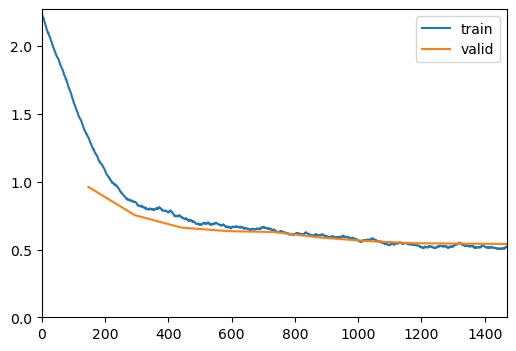

loss: 0.5405648350715637, accuracy:  82.02%


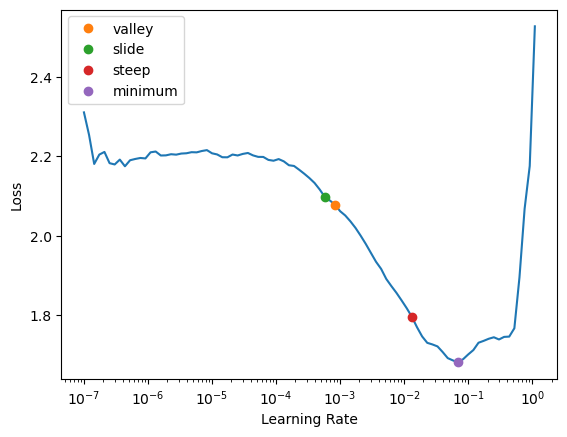

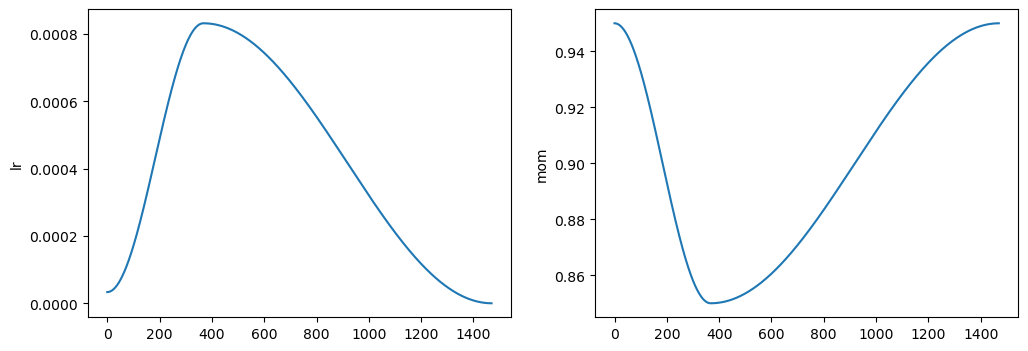

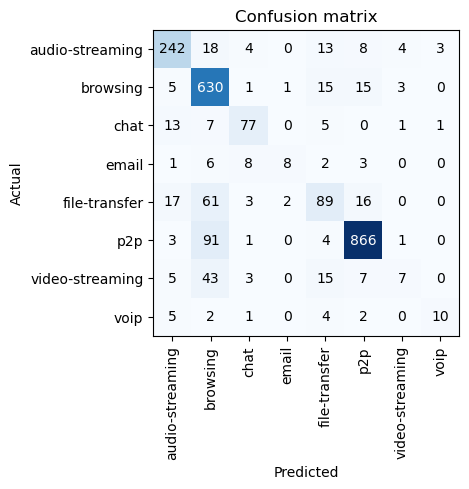

In [69]:

results_sparse_cnn_np_15 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 4,
                'pool_size': 32
            },
            {
                'filters': 2,
                'filter_width': 4,
                # 'pool_size': 32
            }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 16, 32])
post-flatten - torch.Size([64, 512])
Post-run: simple_model - torch.Size([64, 8])


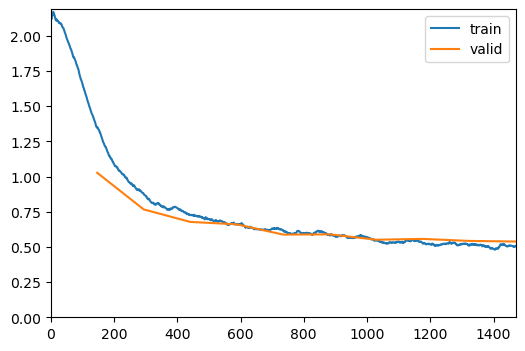

loss: 0.5384437441825867, accuracy:  81.76%


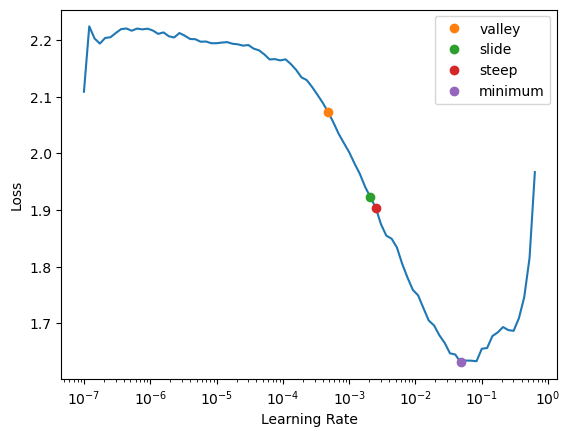

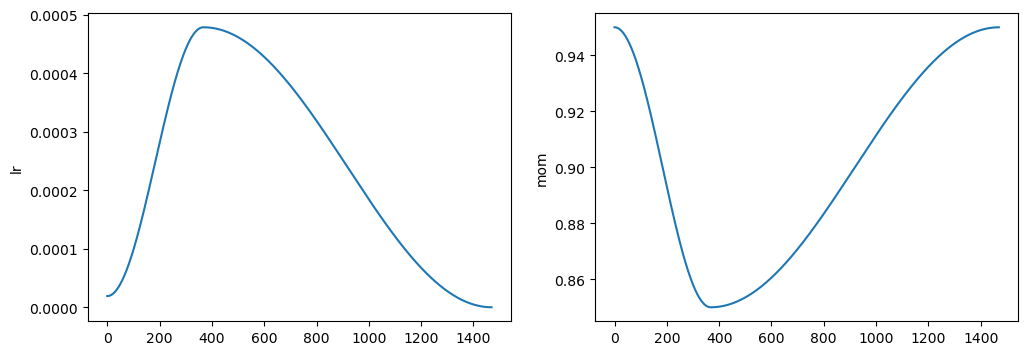

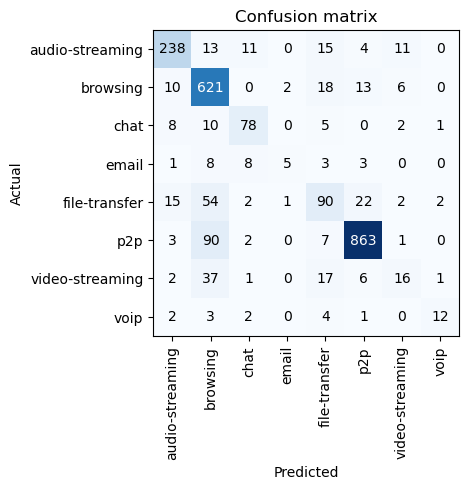

In [70]:

results_sparse_cnn_np_16 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_Normed_Pooled, 
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 4,
                'pool_size': 32
            },
            {
                'filters': 2,
                'filter_width': 8,
                # 'pool_size': 32
            }
        ],
    }
)

In [13]:

class SparseCNN_BNP(nn.Module):
    def __init__(self, input_features = 62, output_features = 8, device = 'cpu', config: dict = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 5,
                'pool_size': 32
            },
        ],

        # 'fc_layers': [
        #     50 for _ in range(3)
        # ]
    }):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features

        conv_layers = []
        pool_layers = []

        last_output_features = input_features

        for i, layer in enumerate(config['conv_layers']):
            channels = 1 if i == 0 else conv_layers[i-1].num_filters * conv_layers[i-1].filter_width

            features = last_output_features            

            conv_layers.append(
                SparseConv(
                    features=features, 
                    channels=channels,
                    filters=layer['filters'], 
                    filter_width=layer['filter_width']
                )
            )

            if 'pool_size' in layer:
                pool_layers.append(
                    nn.AdaptiveMaxPool1d(layer['pool_size'])
                )

                last_output_features = layer['pool_size']

            else:
                pool_layers.append(None)

        layers = []

        for i, layer in enumerate(conv_layers):

            channels = layer.num_filters * layer.filter_width
            
            layers.append(layer)
            layers.append(
                # nn.GroupNorm(channels, channels)
                nn.BatchNorm1d(channels)
            )

            if pool_layers[i] is not None:
                layers.append(pool_layers[i])


        self.layers = nn.Sequential(
            *layers,
            Debug_Module('pre-flatten'),
            nn.Flatten(),
            Debug_Module('post-flatten'),
            nn.Linear(conv_layers[-1].num_filters * conv_layers[-1].filter_width * last_output_features, output_features)
        )

        self.flag: bool = True


    def forward(self, x):
        if self.flag:
            print('Pre-run: simple_model -', x.shape)

        x = x.reshape(x.shape[0], 1, -1)
        if self.flag:
            print("reshaped: simple_model -", x.shape)

        x = self.layers(x)

        if self.flag:
            print('Post-run: simple_model -', x.shape)
            self.flag = False

        # raise Exception('stop')
        return x



Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 2, 32])
post-flatten - torch.Size([64, 64])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


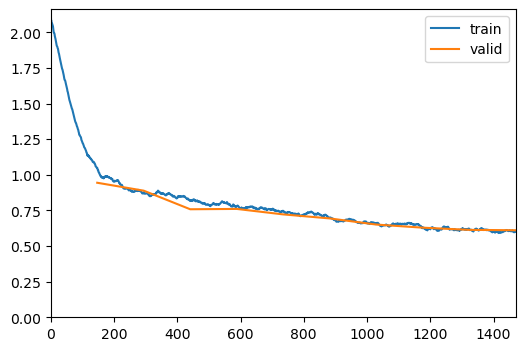

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

loss: 0.6108488440513611, accuracy:  80.10%


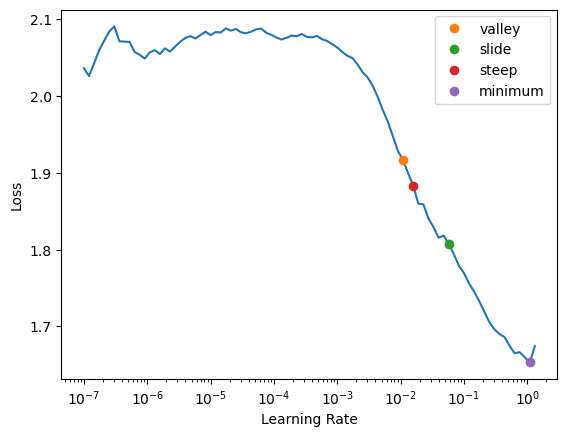

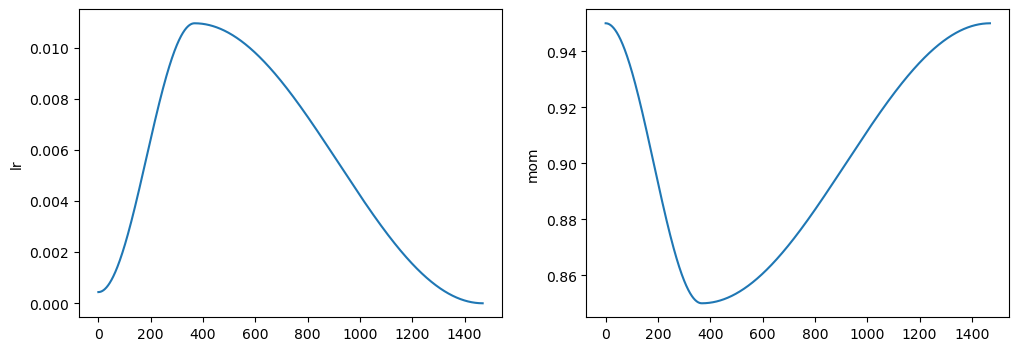

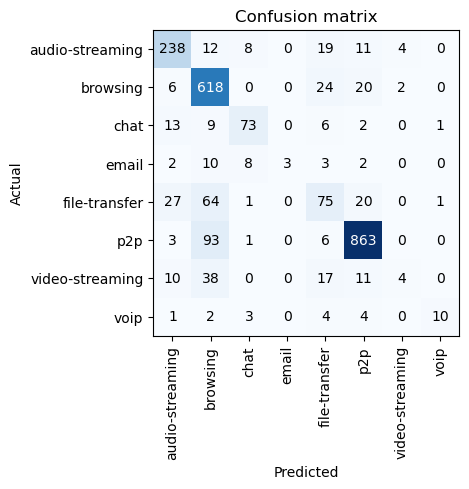

In [15]:

# results_sparse_cnn_np_1 = run_torch_nn_experiment(
#     df.drop(['Traffic Type'], axis=1), 
#     dataset_1['File'], 
#     'Application Type', 
#     SparseCNN_Normed_Pooled, 
#     config = {
#         'conv_layers': [
#             {
#                 'filters': 1,
#                 'filter_width': 2,
#                 'pool_size': 32
#             },
#         ],
#     }
# )

results_spcnn_bnp_1 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_BNP, 
    config = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 2,
                'pool_size': 32
            },
            # {
            #     'filters': 1,
            #     'filter_width': 2,
            # }
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 6, 32])
post-flatten - torch.Size([64, 192])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


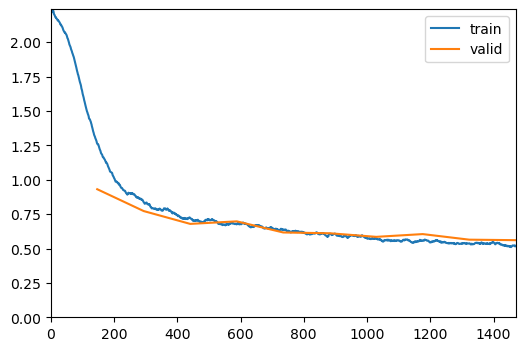

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5606580972671509, accuracy:  81.29%


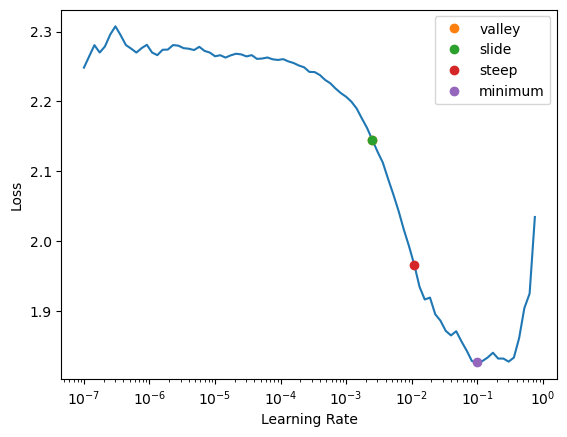

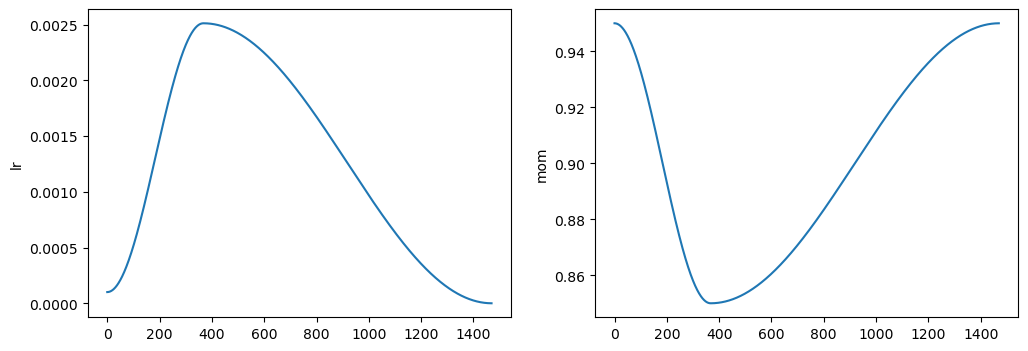

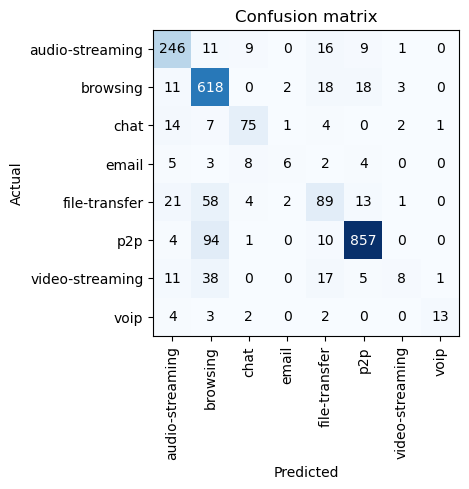

In [16]:
results_spcnn_bnp_2 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_BNP, 
    config = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 6,
                'pool_size': 32
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 12, 32])
post-flatten - torch.Size([64, 384])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


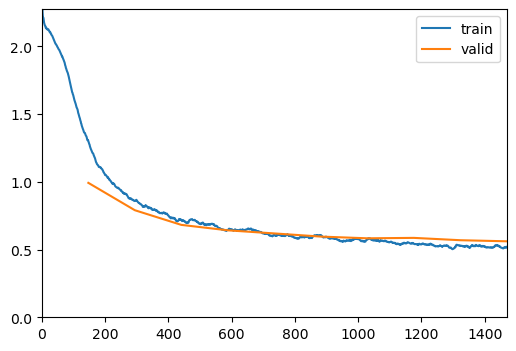

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.5610735416412354, accuracy:  80.78%


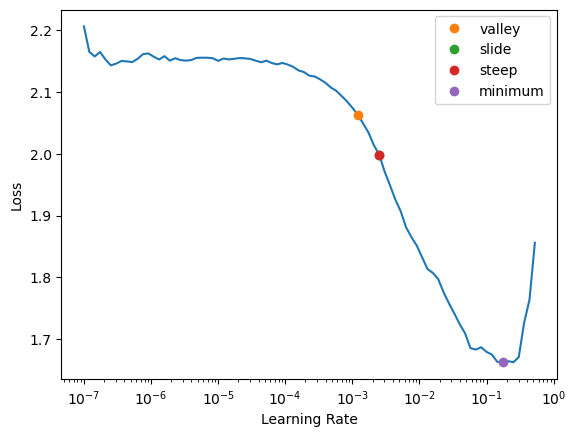

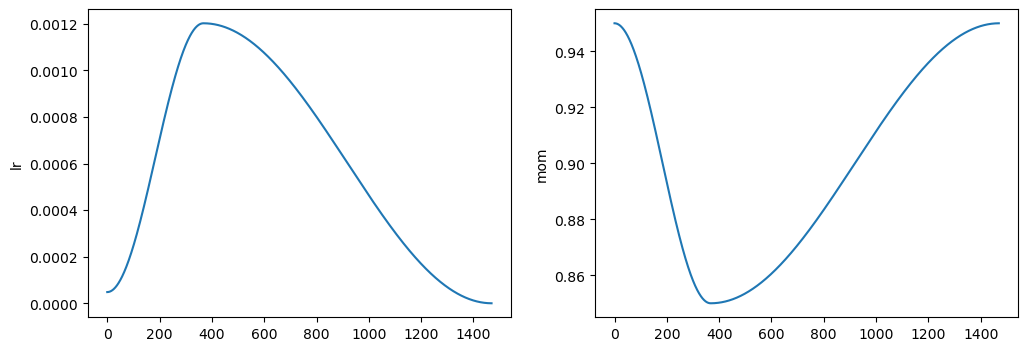

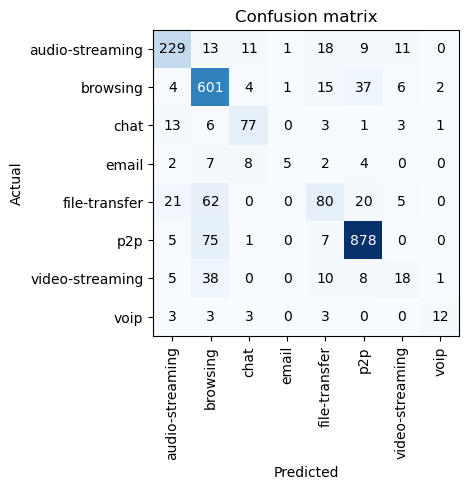

In [18]:
results_spcnn_bnp_3 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_BNP, 
    config = {
        'conv_layers': [
            {
                'filters': 1,
                'filter_width': 12,
                'pool_size': 32
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 6, 32])
post-flatten - torch.Size([64, 192])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


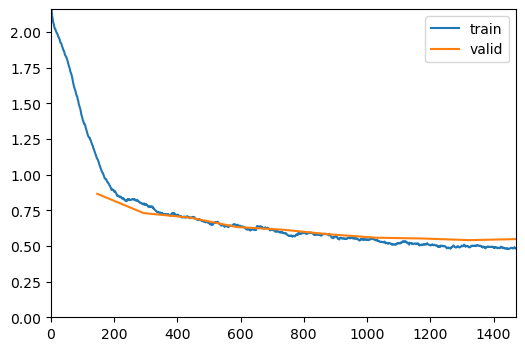

loss: 0.548170268535614, accuracy:  81.29%


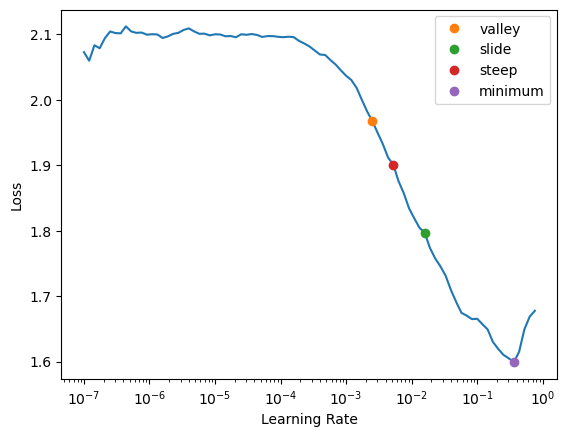

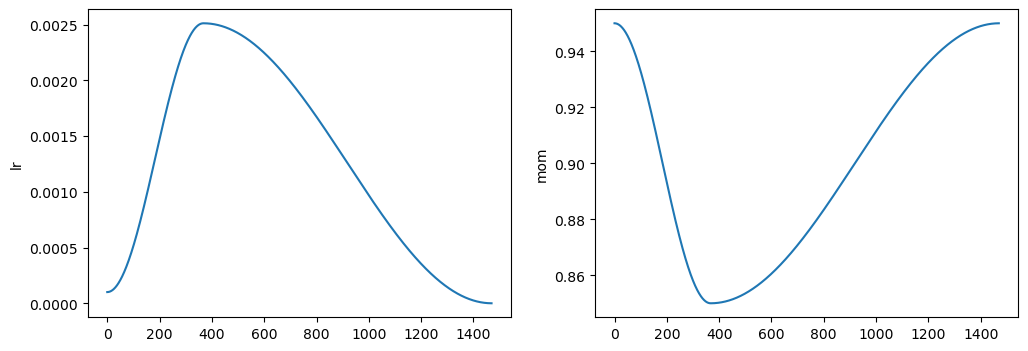

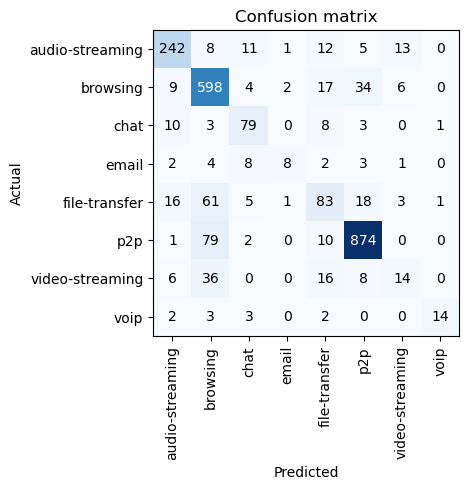

In [19]:
results_spcnn_bnp_4 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_BNP,
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 2,
                'pool_size': 32
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 12, 32])
post-flatten - torch.Size([64, 384])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


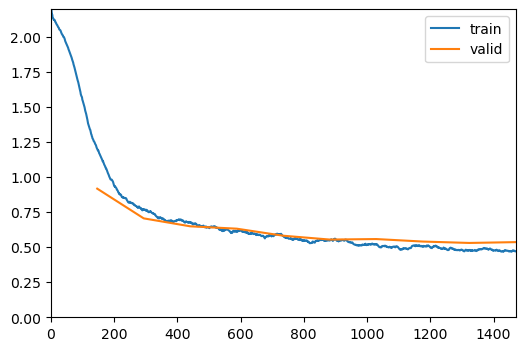

loss: 0.5356820821762085, accuracy:  82.57%


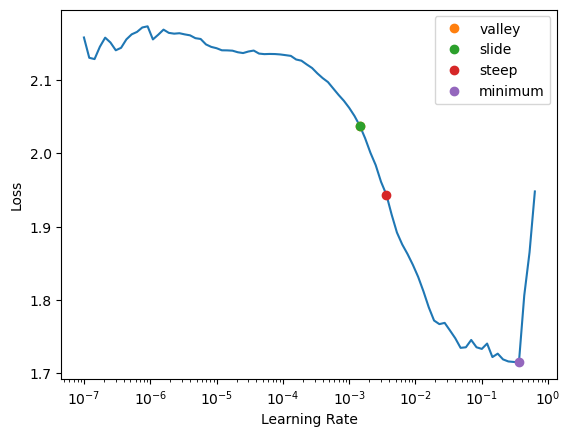

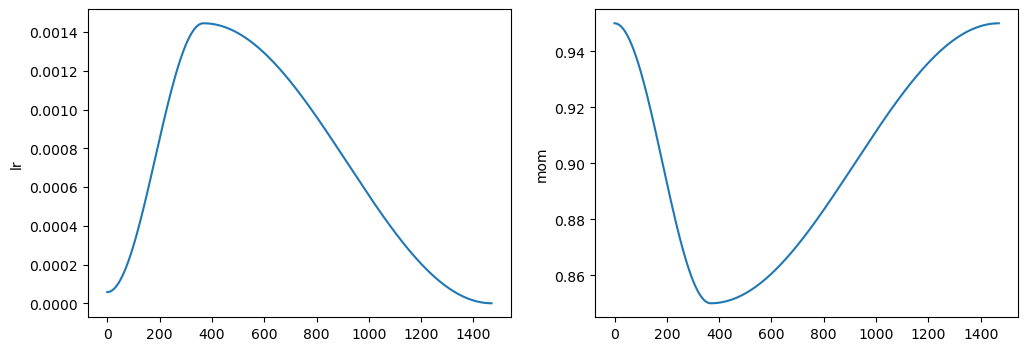

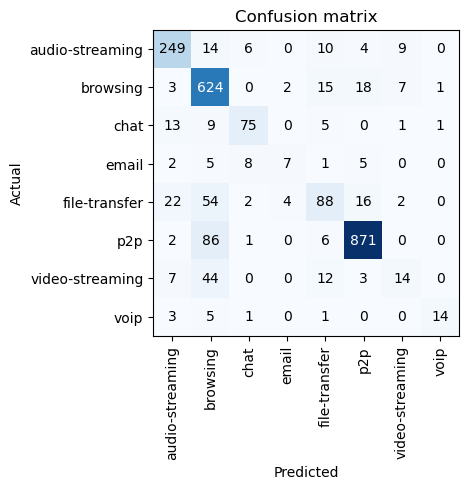

In [20]:
results_spcnn_bnp_5 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_BNP,
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 4,
                'pool_size': 32
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 24, 32])
post-flatten - torch.Size([64, 768])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


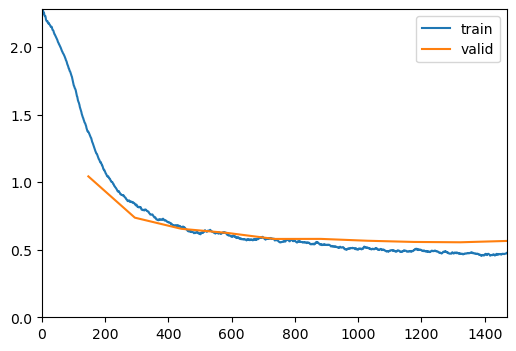

loss: 0.5649243593215942, accuracy:  80.91%


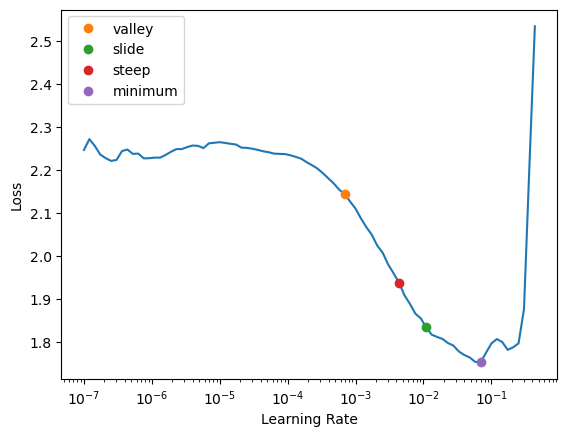

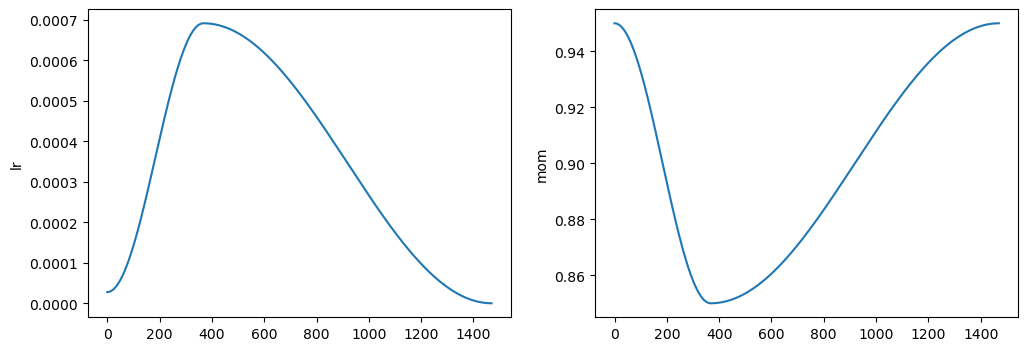

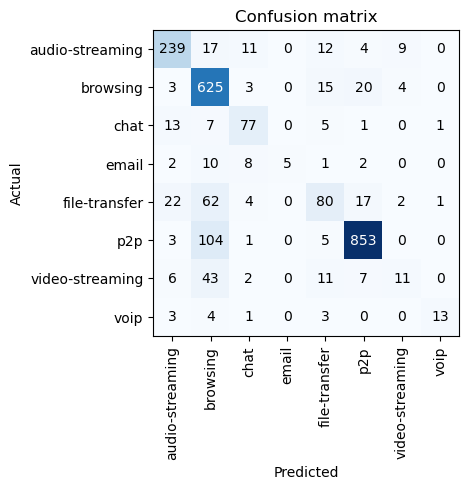

In [22]:
results_spcnn_bnp_6 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_BNP,
    config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 8,
                'pool_size': 32
            },
        ],
    }
)

Shape of Input Data: (11762, 63)


Pre-run: simple_model - torch.Size([64, 64])
reshaped: simple_model - torch.Size([64, 1, 64])
pre-flatten - torch.Size([64, 36, 32])
post-flatten - torch.Size([64, 1152])
Post-run: simple_model - torch.Size([64, 8])


/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


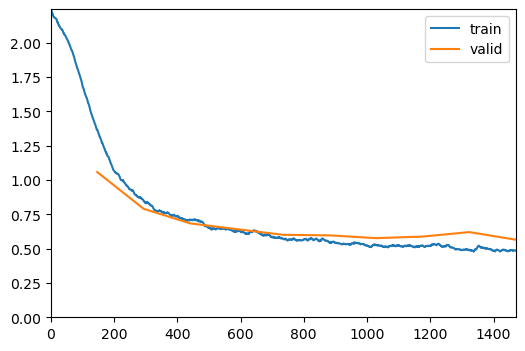

/Users/jameshalladay/opt/anaconda3/envs/fast/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.565423846244812, accuracy:  81.29%


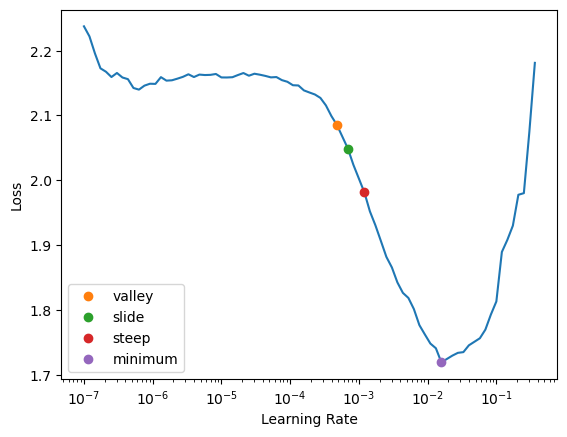

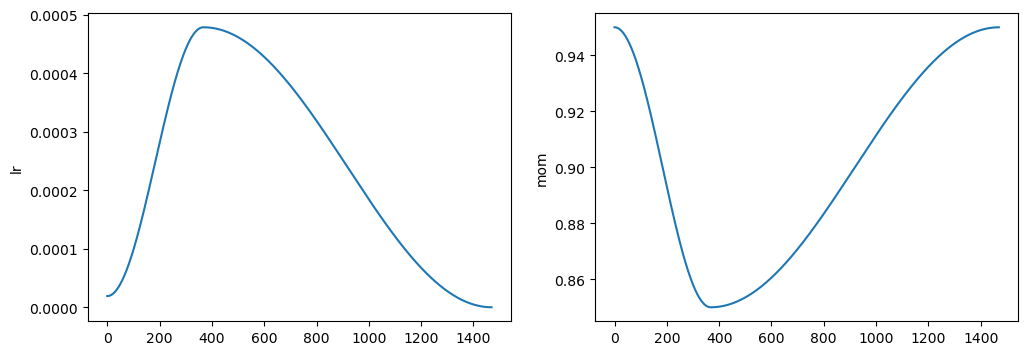

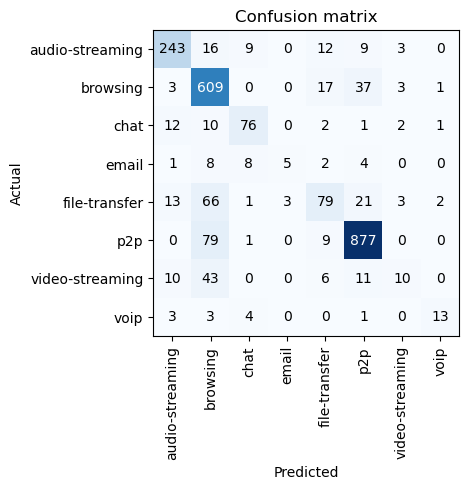

In [26]:
results_spcnn_bnp_7 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_BNP,
        config = {
        'conv_layers': [
            {
                'filters': 3,
                'filter_width': 12,
                'pool_size': 32
            },
        ],
    }
)

In [ ]:
results_spcnn_bnp_8 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_BNP,
    
)

In [ ]:
results_spcnn_bnp_9 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_BNP,
    
)

In [ ]:
results_spcnn_bnp_10 = run_torch_nn_experiment(
    df.drop(['Traffic Type'], axis=1), 
    dataset_1['File'], 
    'Application Type', 
    SparseCNN_BNP,
    
)

In [14]:
# results_spcnn_bnp_1 = run_torch_nn_experiment(
#     df.drop(['Traffic Type'], axis=1), 
#     dataset_1['File'], 
#     'Application Type', 
#     SparseCNN_BNP, 
#     config = {
#         'conv_layers': [
#             {
#                 'filters': 3,
#                 'filter_width': 2,
#                 'pool_size': 32
#             },
#             {
#                 'filters': 1,
#                 'filter_width': 2,
#             }
#         ],
#     }
# )

In [ ]:
results_simple_filter.model.model.model

In [ ]:

model_1 = results.model.model.model
model_2 = results_res.model.model.model
model_3 = results_simple_res.model.model.model
model_4 = results_simple_filter.model.model.model

print(f"Deep NN 50x10 has {sum(p.numel() for p in model_1.parameters())} parameters")
print(f"Deep Res NN 50x10 has {sum(p.numel() for p in model_2.parameters())} parameters")
print(f"Simple Res NN 50x10 has {sum(p.numel() for p in model_3.parameters())} parameters")
print(f"Sparse CNN 1 filter has {sum(p.numel() for p in model_4.parameters())} parameters")

In [ ]:


class Simple_Model(nn.Module):
    def __init__(self, input_features=62, output_features=8, config: dict = None):
        super().__init__()

        self.out = nn.Sequential(
            nn.Linear(input_features, 105, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(105, 105, bias=False),
            nn.ReLU(inplace=True),

            nn.Linear(105, output_features+1)
        )

        self.flag: bool = True

        
    def forward(self, x):

        if self.flag:
            print(x.shape)

        x = self.out(x)

        if self.flag:
            print(x.shape)
            self.flag = False

        return x

results_t_res = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Model)


In [ ]:
from fastai.layers import SimpleCNN
from fastai.vision.all import resnet50

In [ ]:
res_model = resnet50(pretrained=True)

In [ ]:
SimpleCNN([1,8,8])

In [ ]:
res_model

In [ ]:
class Flow_Wrapping_2D_CNN(nn.Module):
    def __init__(self, input_features=62, output_features=8, config: dict = None):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features
        self.config = config

        self.lgi = self.find_least_greatest_int()

        self.out = nn.Sequential(
            SimpleCNN([1,8,8]),
        )

    
    def find_least_greatest_int(self) -> int:
        ''' 
            This method will find the least greatest int z such that
                z^2 >= input_features
        '''

        z = 1

        while(z**2 < self.input_features):
            z += 1

        return z

    def resphape_input(self, x):
        '''
            This method will return the new shape for the input
        '''

        new_input_length = self.lgi**2

        if(x.shape[1] < new_input_length):
            x = torch.cat((x, torch.zeros((x.shape[0], new_input_length - x.shape[1]), device=x.device)), dim=1)

        x = x.reshape(-1, 1, self.lgi, self.lgi)

        # now we pad to make the shape -1x3xlgixlgi
        
        return x
        
    def forward(self, x):
        # first, we reshape the input into an MxM matrix

        # print(x.shape)
        x = self.resphape_input(x)
        # x = x.reshape(-1, self.input_features // 2, 2)
        # print(x.shape)

        # first, we pad the input with n zeros so we can reshape the input into a MxM matrix
        # x = torch.cat((x, torch.zeros((x.shape[0], 2), device=x.device)), dim=1)
        x = self.out(x)
        # print(x.shape)
        return x


results_fw_cnn = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Flow_Wrapping_2D_CNN)


In [ ]:


class Simple_Model_2(nn.Module):
    def __init__(self, input_features=62, output_features=8, config: dict = None):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features
        self.config = config

        self.lgi = self.find_least_greatest_int()

        self.out = nn.Sequential(
            # SimpleCNN([1,8,8]),
            res_model.modules
        )

    
    def find_least_greatest_int(self) -> int:
        ''' 
            This method will find the least greatest int z such that
                z^2 >= input_features
        '''

        z = 1

        while(z**2 < self.input_features):
            z += 1

        return z

    def resphape_input(self, x):
        '''
            This method will return the new shape for the input
        '''

        new_input_length = self.lgi**2

        if(x.shape[1] < new_input_length):
            x = torch.cat((x, torch.zeros((x.shape[0], new_input_length - x.shape[1]), device=x.device)), dim=1)

        x = x.reshape(-1, 1, self.lgi, self.lgi)

        # now we pad to make the shape -1x3xlgixlgi
        
        return x
        
    def forward(self, x):
        # first, we reshape the input into an MxM matrix

        # print(x.shape)
        x = self.resphape_input(x)
        # x = x.reshape(-1, self.input_features // 2, 2)
        # print(x.shape)

        # first, we pad the input with n zeros so we can reshape the input into a MxM matrix
        # x = torch.cat((x, torch.zeros((x.shape[0], 2), device=x.device)), dim=1)
        x = self.out(x)
        # print(x.shape)
        return x


results_t_res = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Model_2)


In [ ]:


class Simple_Model_2(nn.Module):
    def __init__(self, input_features=62, output_features=8, config: dict = None):
        super().__init__()

        self.input_features = input_features
        self.output_features = output_features
        self.config = config
        self.flag = False
        self.channels = 4


        self.lgi = self.find_least_greatest_int()

        self.out = nn.Sequential(
            SimpleCNN([
                self.channels,
                self.channels*4,
                self.channels*16,
                self.channels*32, 
                output_features
            ]),
        )

    
    def find_least_greatest_int(self) -> int:
        ''' 
            This method will find the least greatest int z such that
                z^2 >= input_features
        '''

        z = 1

        while(z**2 < self.input_features):
            z += 1

        return z

    def resphape_input(self, x):
        '''
            This method will return the new shape for the input
        '''

        new_input_length = self.lgi**2

        if(x.shape[1] < new_input_length):
            x = torch.cat((x, torch.zeros((x.shape[0], new_input_length - x.shape[1]), device=x.device)), dim=1)

        x = x.reshape(-1, 1, self.lgi, self.lgi)

        # now we duplicate the channels
        x = torch.cat(list((x for _ in range(self.channels))), dim=1)
        # x = torch.cat((x, x, x), dim=1)

        # now we pad to make the shape -1x3xlgixlgi
        # x = torch.cat((x, torch.zeros((x.shape[0], 2, self.lgi, self.lgi), device=x.device)), dim=1)
        
        return x
        
    def forward(self, x):
        # first, we reshape the input into an MxM matrix

        # print(x.shape)
        if not self.flag:
            print(x.shape)
        x = self.resphape_input(x)
        if not self.flag:
            print(x.shape)
        # x = x.reshape(-1, self.input_features // 2, 2)
        # print(x.shape)

        # first, we pad the input with n zeros so we can reshape the input into a MxM matrix
        # x = torch.cat((x, torch.zeros((x.shape[0], 2), device=x.device)), dim=1)
        x = self.out(x)
        if not self.flag:
            print(x.shape)
            self.flag = True
        # print(x.shape)
        return x


results_t_res = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Model_2)


In [ ]:
from random import randint
# from torch.nn.modules import 
from math import floor 

class ContinuousConvLayer1d(nn.Module):
    def __init__(self, 
        input_features=62, 
        channels=1,
        input_width=5,
        output_width=5,
        kernel=nn.Linear, # a kernel to apply to the input in each filter, will be summed accros the width dimension of the input
        filters=4,     # number of independent filters with their own kernel
        filter_size=5, # input size for the kernel
        stride=1,      # determines th step size for each application of the kernel
    ):
        '''
            This model with create a convolutional layer for 1-D data using an MLP kernel

            input shape:
                [batch_size, input_channels, input_width, input_features]
            output shape:
                [batch_size, filters, output_width, floor(input_features/stride)]


        '''

        super().__init__()

        self.input_features = input_features
        self.input_channels = channels
        self.input_width = input_width
        self.output_features = floor(input_features/stride)
        self.output_channels = filters
        self.output_width = output_width
        self.kernel = kernel
        self.stride = stride

        self.num_filters = filters
        self.filter_size = output_width
        self.flag = False
        self.channels = 4





    
    def forward(self, x):
        '''
            expects a input of shape (batch_size, channels, width, features)
        '''
        # first, we reshape the input into an MxM matrix

        # print(x.shape)
        if not self.flag:
            print(x.shape)
        x = self.resphape_input(x)
        if not self.flag:
            print(x.shape)
        # x = x.reshape(-1, self.input_features // 2, 2)
        # print(x.shape)

        # first, we pad the input with n zeros so we can reshape the input into a MxM matrix
        # x = torch.cat((x, torch.zeros((x.shape[0], 2), device=x.device)), dim=1)
        x = self.out(x)
        if not self.flag:
            print(x.shape)
            self.flag = True
        # print(x.shape)
        return x


results_t_res = run_torch_nn_experiment(df.drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', Simple_Model_2)


In [ ]:
# We now find the number of parameters used in the model

model_1 = Simple_Model()
model_2 = Simple_Model_2()
model

print(f"Model 1 has {sum(p.numel() for p in model_1.parameters())} parameters")
print(f"Model 2 has {sum(p.numel() for p in model_2.parameters())} parameters")


In [ ]:
import numpy as np
print(len(list(model.parameters())))
print(sum([np.prod(p.size()) for p in model.parameters()]))

In [ ]:
print(sum([np.prod(p.size()) for p in model.parameters() if p.requires_grad]))

In [ ]:
# get current directory and the name of the running file, __file__ is unavailable
import os
import inspect
print(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))


In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "theNotebook = " + "'"+attribs['data-notebook-name'].value+"'";
kernel.execute(command);

In [ ]:
%conda install -c conda-forge ipynbname

In [ ]:
file = ""

try:
    # file = __file__
    import nothing
except:
    print('hello')

In [ ]:
import ipynbname

In [ ]:
ipynbname.path()

In [ ]:
print(theNotebook)


In [ ]:
print(nb_name)

In [ ]:
import os
nb_full_path = os.path.join(os.getcwd(), nb_name)

In [ ]:
dataset_1['Dataset'].columns

In [ ]:
__file__

In [ ]:
torch.device('mps')

In [ ]:
results = run_deep_nn_experiment(dataset_1['Dataset'].drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type',(50 for _ in range(10)))


In [ ]:
results_res = run_residual_deep_nn_experiment(dataset_1['Dataset'].drop(['Traffic Type'], axis=1), dataset_1['File'], 'Application Type', (50 for _ in range(10)))
